In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
from matplotlib.lines import Line2D
#check version pandas

# Seaborn is a cool library to use whenever starting data exploration


import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=23)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

import warnings
warnings.filterwarnings("ignore")

In this notebook we are going to look at a particular form of machine learning called unsupervised learning. It is a form that you are probably familiar with through algorithms like **PCA** or **t-SNE**. Here you are not really looking at having a predictive model for some variables but rather **find a structure among these variables**:
![sup_unsup](../images/sup_unsup.png)

# Data exploration
## Table Of Content: <a id="toc"></a>
* [**Data prepartion for ML**](#first-bullet)
    * [First look at the data](#FL-bullet)
    * [Value transformation and variance stabilization](#TR-bullet)
    * [Missing Values](#MV-bullet)
    * [Checking Types](#TY-bullet)
    * [OneHot Encoding](#OH-bullet)


* [**Dimensionality reduction/Embedding**](#fourth-bullet)
    * [Principal component analysis](#PCA-bullet)
    * [PCA for the phospho-proteomic dataset](#PCAp-bullet)
    * [Data rescaling for PCA or distance-based methods](#rescale)
    * [Exercise: PCA](#exo-pca)
    * [Independant component analysis](#ICA-bullet)
    * [t-SNE](#tsne-bullet)
     

* [**Clustering methods**](#fifth-bullet)
    * [K-means](#Kmeans-bullet)
    * [Exercise: Kmeans](#exo-kmeans)
    * [Hierarchichal clustering](#HC-bullet)
    * [DBSCAN](#DBSCAN-bullet)
    * [What is the best method for clustering ?](#best)
    
* [**Appendix**](#appendix-bullet)
    * [Whitening](#whiten-bullet)
    * [UMAP](#umap-bullet)
    * [Gaussian mixtures](#gm-bullet)


[back to ToC](#toc)

# Data prepartion for ML <a class="anchor" id="first-bullet"></a>

[back to ToC](#toc)

### First look at the data <a class="anchor" id="FL-bullet"></a>

In this intoduction we are using a yeast Phospho proteomics dataset [Plank et al. MCP, 2020](https://doi.org/10.1074/mcp.RA120.001955). 
The study performed a LC-MS/MS experiment and label-free quantitation to study the effect of AGC-kinases (Sch9, Pka1, Ypk1) inhibition on the phosphoproteome. 

5 yeast strains were used: WT, and Sch9, Pka1, Sch9&Pka1, Ypk1 mutant strains. 

Sch9, Pka1, Ypk1 were mutated in order to allow the 1NMPP1 molecule to bind to the mutant and inhibit its active site. 

DMSO was used as a control. All measurements were performed in 3 technical replicates.

In [5]:
df_ph = pd.read_excel('../data/Phospho_TOR_inhib.xls', sheet_name='Phospho_TOR_inhib',header=0)
df_ph.head()

Peptide sequence Phosphosites Standard name       WT_DMSO  \
0        ADDEEDLS(Phospho)DENIQPELR         S720          ABF1  1.291531e+08   
1       NVVDENLINDMDS(Phospho)EDAHK         S618          ABF1  0.000000e+00   
2                 SNS(Phospho)IDYAK         S467          ABF1  9.528159e+06   
3                  AST(Phospho)PPVK         T157          ABP1  0.000000e+00   
4  KEPVKT(Phospho)PS(Phospho)PAPAAK    T181 S183          ABP1  1.794915e+07   

      WT_DMSO.1     WT_DMSO.2     WT_1NMPP1   WT_1NMPP1.1   WT_1NMPP1.2  \
0  1.378099e+08  1.264078e+08  1.093194e+08  1.207158e+08  1.143397e+08   
1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2  9.008914e+06  8.909709e+06  9.653322e+06  8.720282e+06  9.312677e+06   
3  0.000000e+00  0.000000e+00  6.426355e+05  5.563823e+05  7.040516e+05   
4  1.813076e+07  1.651690e+07  1.630399e+07  1.657684e+07  1.456594e+06   

      Sch9_DMSO  ...  Sch9_Pka1_DMSO.2  Sch9_Pka1_1NMPP1  Sch9_Pka1_1NMPP1.1  \
0  1.178994e+08  ...      1.292352e+08      1.150856e+08        1.289056e+08   
1  0.000000e+00  ...      0.000000e+00      0.000000e+00        8.857596e+06   
2  1.167629e+07  ...      8.144665e+06      1.424212e+07        1.518253e+07   
3  0.000000e+00  ...      0.000000e+00      0.000000e+00        0.000000e+00   
4  0.000000e+00  ...      0.000000e+00      1.015874e+08        8.166463e+07   

   Sch9_Pka1_1NMPP1.2     Ypk1_DMSO   Ypk1_DMSO.1   Ypk1_DMSO.2   Ypk1_1NMPP1  \
0        1.246350e+08  1.027790e+08  9.492511e+07  9.892962e+07  9.760830e+07   
1        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2        1.120638e+07  4.292957e+06  4.453389e+06  5.198223e+06  4.205676e+06   
3        0.000000e+00  0.000000e+00  0.000000e+00  5.659378e+05  1.221233e+06   
4        8.378514e+07  0.000000e+00  0.000000e+00  4.784055e+07  5.243548e+07   

   Ypk1_1NMPP1.1  Ypk1_1NMPP1.2  
0   1.005682e+08   1.023071e+08  
1   0.000000e+00   0.000000e+00  
2   4.287624e+06   6.059179e+06  
3   0.000000e+00   0.000000e+00  
4   5.166661e+07   6.010725e+07  

[5 rows x 33 columns]

We can look at the reproducibility of the replicates using seaborn `pairplot`.

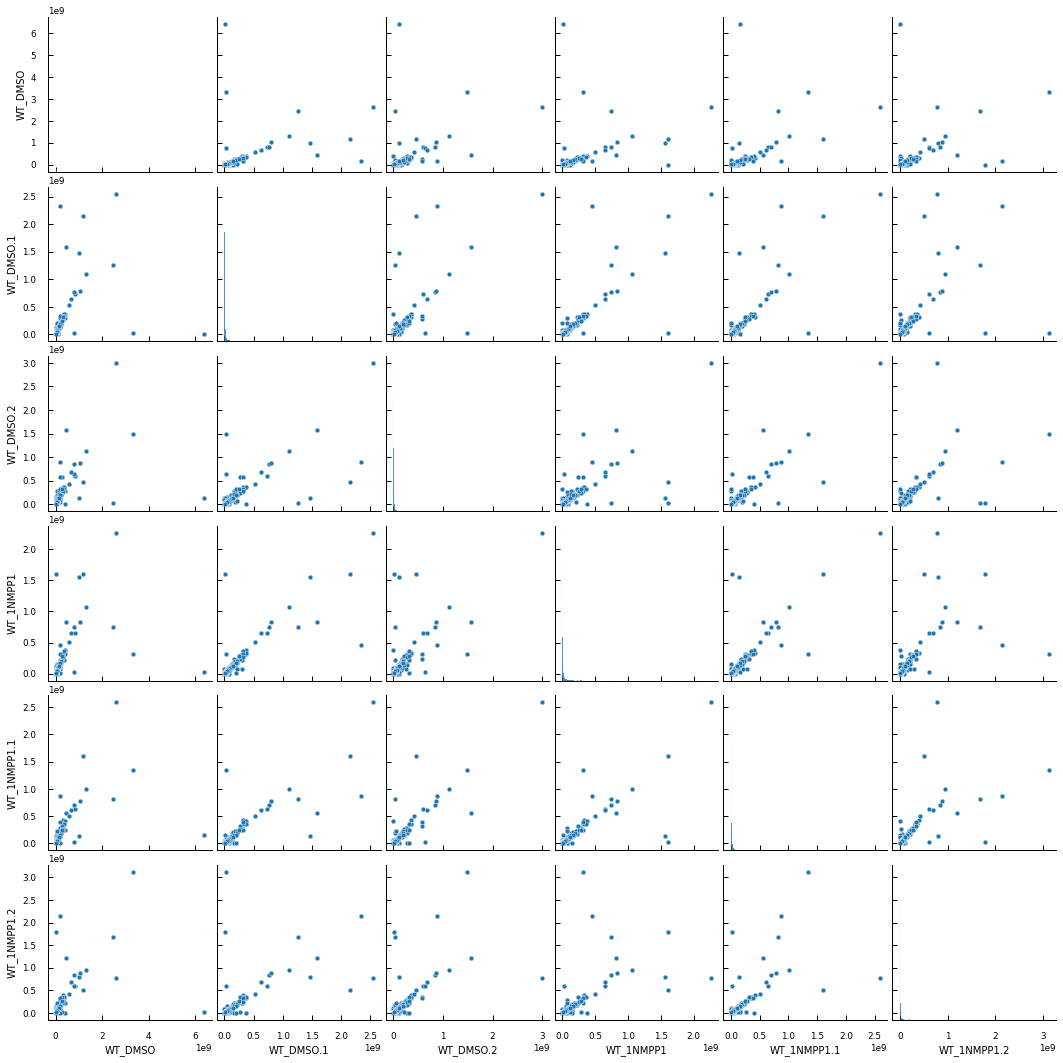

In [6]:
X_ph = df_ph.iloc[:,3:] ## we put metadata aside to focus on the physical measurments
sns.set_context("paper", rc={"axes.labelsize":10})

sns.pairplot(X_ph.iloc[:,0:6]) ## pairplot of the 6 six columns only

This plot shows an important characteristics of the data: **the scatter of the points increases with increasing MS1 intensity values**, which is a common feature in quantitative proteomics (and other omics) data. 

This is not ideal as this may make subsequent data analysis (e.g. t-tests) harder, or non-applicable.

We can address this by **log-transforming** the intensity values, which stabilizes the variance i.e. the scatter or variance will be constant or depend less on the values. 


[back to ToC](#toc)

### Value transformation and variance stabilization <a class="anchor" id="TR-bullet"></a>

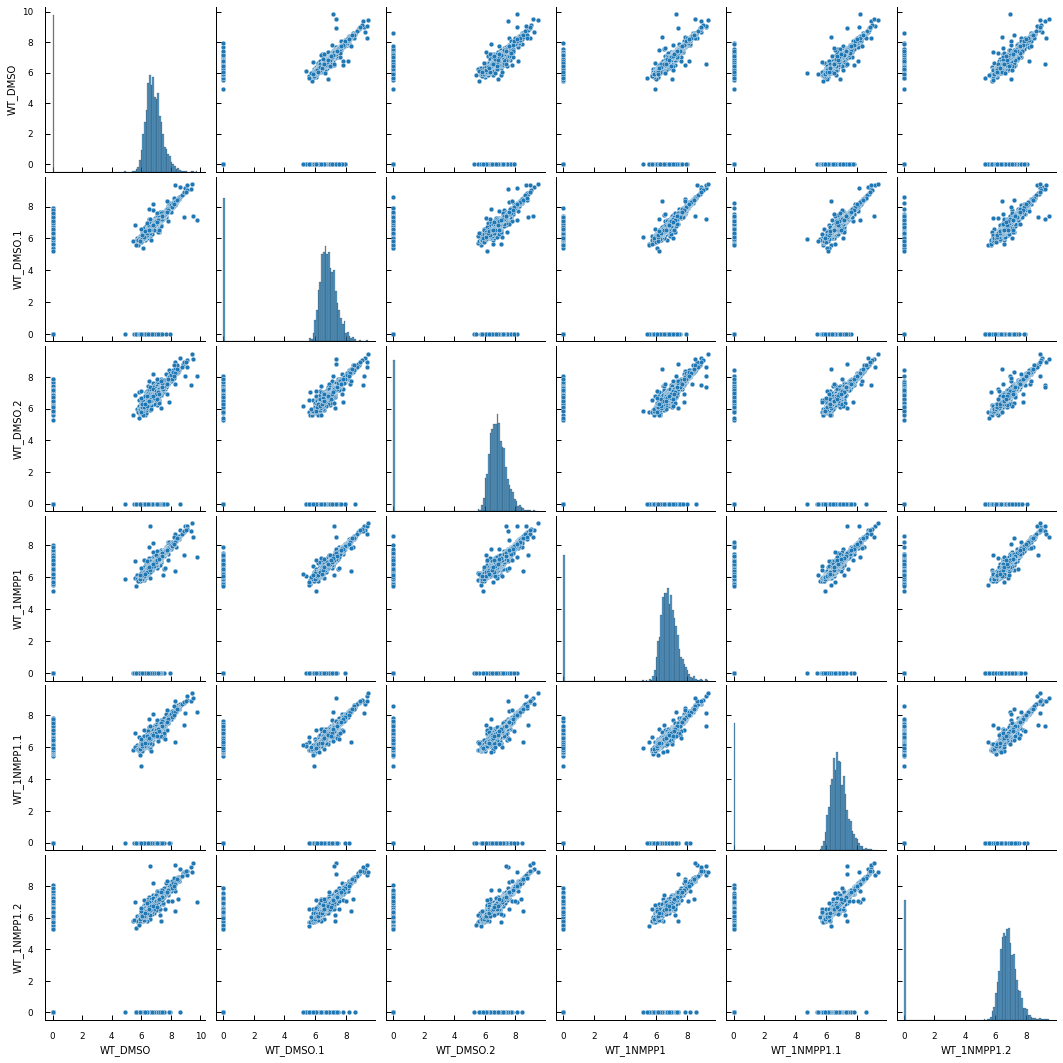

In [7]:
# log transformation. note the +1 to handle the eventual 0s in the data 
X_ph = X_ph.transform(lambda x: np.log10(x + 1))

sns.set_context("paper", rc={"axes.labelsize":10})
sns.pairplot(X_ph.iloc[:,0:6])

[back to ToC](#toc)

### Missing Values <a class="anchor" id="MV-bullet"></a>

The scatter of the points does not seem to depend anymore on the log-intensity value. The log-intensities are more evenly distributed compared to the raw intensities. The missing or zero values are clearly separated from the positive values (bottom and left points). 

Missing values are common in proteomics data. They are caused by the limited sensitivity of the mass spectrometers or inaccuracies in the computational data processing.

In order to get a better look at the entire dataset, we plot the data as a heatmap:

In [8]:
df_ph.shape

(2959, 33)

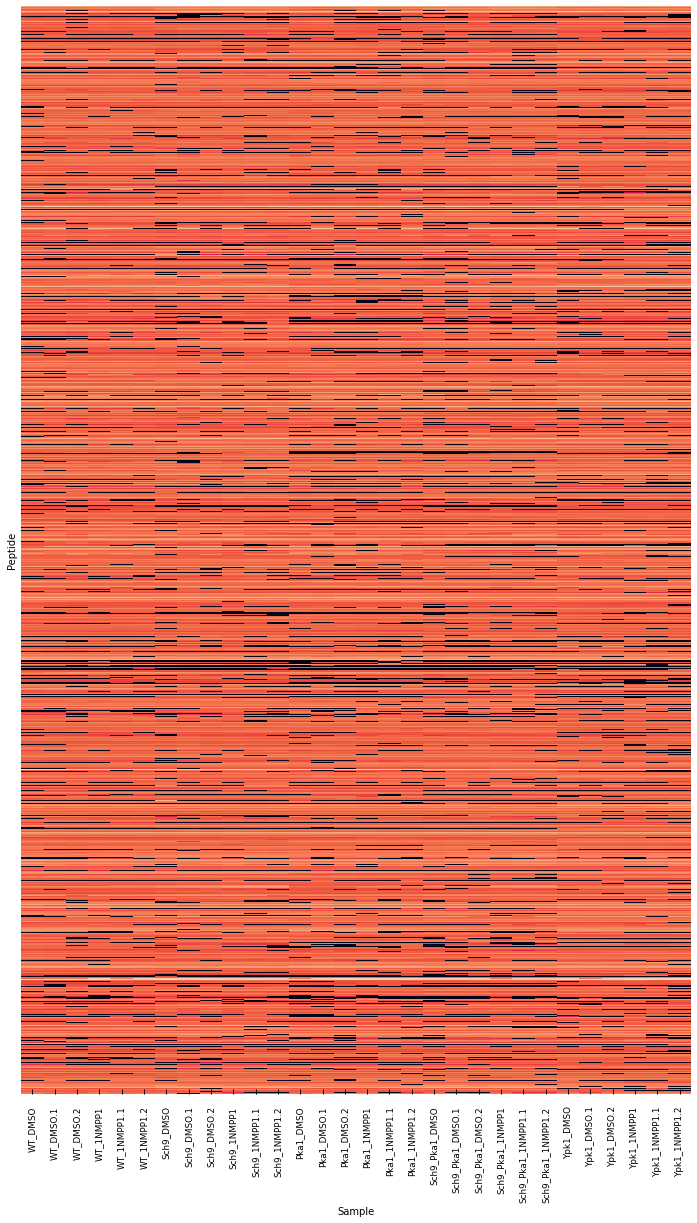

In [9]:
plt.figure(figsize=(12,20))
X_ph.set_index(df_ph['Peptide sequence'], inplace=True) 

ax = sns.heatmap(X_ph, cbar=False,yticklabels=False)
plt.xlabel("Sample")
plt.ylabel("Peptide")
plt.show()

This shows that the missing or zero values (dark lines) are ubiquiteous. 

The missing values are not randomly distributed but more likely for low intensity peptides: the average peptide intensity decreases with increasing number of missing values per peptide. 

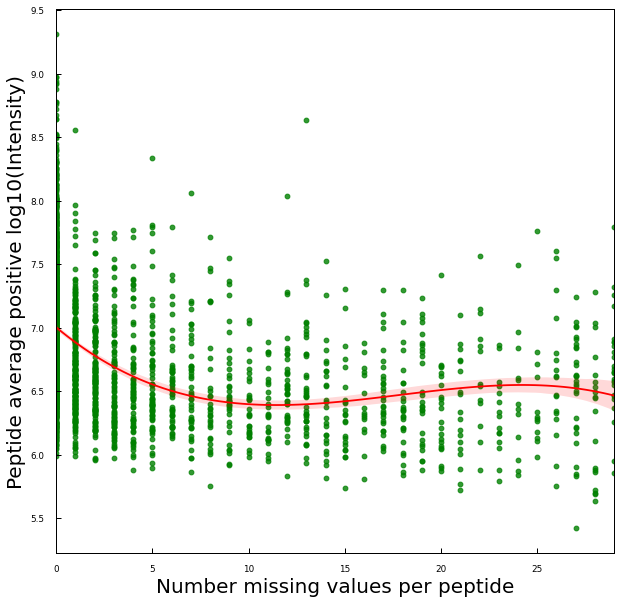

In [10]:
sns.set_context("paper", rc={"axes.labelsize":20})

avg = X_ph[X_ph>0].mean(axis=1) # average of non-null values

nr_missing = (X_ph==0).sum(axis=1) # number of null values

plt.figure(figsize=(10,10))
sns.regplot(x=nr_missing, y=avg, order=3, color="g",line_kws={'color':"red"})
plt.ylabel('Peptide average positive log10(Intensity)')
plt.xlabel('Number missing values per peptide')
plt.show(block=False)

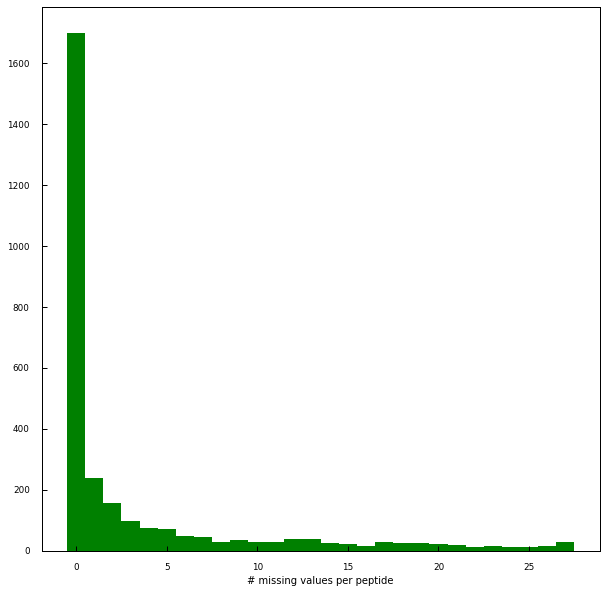

In [11]:
sns.set_context("paper", rc={"axes.labelsize":10})
nr_missing = (X_ph==0).sum(axis=1)
plt.figure(figsize=(10,10))
plt.hist(nr_missing, color="g",bins=np.arange(0,29)-0.5)
plt.xlabel("# missing values per peptide")
plt.show()

> Note : here missing values correspond to 0. Often they can also be represented using either an `np.nan` or `pd.nan` object which you can test using the [`pandas.DataFrame.isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull) function.

They are many ways to deal with missing values. The simplest strategies are just to remove all peptides that contain a missing value or impute the value according to some relevant statistics or modeling (imputation is a science and is clearly out of our scope here).

**Most of the peptides have no missing values** and discarding all peptides with missing values is not an optimal, but feasible strategy for these data. 

In [12]:
X_ph_positive = X_ph[(X_ph>0).all(axis=1)] ## keeping only non-0 values
X_ph_positive.head()

WT_DMSO  WT_DMSO.1  WT_DMSO.2  \
Peptide sequence                                                            
ADDEEDLS(Phospho)DENIQPELR                 8.111105   8.139281   8.101774   
SNS(Phospho)IDYAK                          6.979009   6.954673   6.949864   
KEPVKTPS(Phospho)PAPAAK                    7.376958   7.277585   7.236313   
NEKS(Phospho)PAQLWAER                      6.157649   6.020137   6.151031   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK  7.088574   7.040337   7.016449   

                                           WT_1NMPP1  WT_1NMPP1.1  \
Peptide sequence                                                    
ADDEEDLS(Phospho)DENIQPELR                  8.038697     8.081764   
SNS(Phospho)IDYAK                           6.984677     6.940531   
KEPVKTPS(Phospho)PAPAAK                     7.379282     7.286498   
NEKS(Phospho)PAQLWAER                       6.146390     6.070549   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK   7.006731     6.976935   

                                           WT_1NMPP1.2  Sch9_DMSO  \
Peptide sequence                                                    
ADDEEDLS(Phospho)DENIQPELR                    8.058197   8.071512   
SNS(Phospho)IDYAK                             6.969075   7.067305   
KEPVKTPS(Phospho)PAPAAK                       7.263972   7.633745   
NEKS(Phospho)PAQLWAER                         6.110564   6.381188   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     6.977722   7.017229   

                                           Sch9_DMSO.1  Sch9_DMSO.2  \
Peptide sequence                                                      
ADDEEDLS(Phospho)DENIQPELR                    8.165305     8.080783   
SNS(Phospho)IDYAK                             7.071589     6.999701   
KEPVKTPS(Phospho)PAPAAK                       7.687869     7.546505   
NEKS(Phospho)PAQLWAER                         6.332733     6.460504   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     7.010478     6.982010   

                                           Sch9_1NMPP1  ...  Sch9_Pka1_DMSO.2  \
Peptide sequence                                        ...                     
ADDEEDLS(Phospho)DENIQPELR                    8.132232  ...          8.111381   
SNS(Phospho)IDYAK                             7.135595  ...          6.910873   
KEPVKTPS(Phospho)PAPAAK                       7.629455  ...          7.593738   
NEKS(Phospho)PAQLWAER                         6.445138  ...          6.588172   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK     6.957545  ...          6.973805   

                                           Sch9_Pka1_1NMPP1  \
Peptide sequence                                              
ADDEEDLS(Phospho)DENIQPELR                         8.061021   
SNS(Phospho)IDYAK                                  7.153575   
KEPVKTPS(Phospho)PAPAAK                            7.760404   
NEKS(Phospho)PAQLWAER                              6.748983   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK          6.966654   

                                           Sch9_Pka1_1NMPP1.1  \
Peptide sequence                                                
ADDEEDLS(Phospho)DENIQPELR                           8.110272   
SNS(Phospho)IDYAK                                    7.181344   
KEPVKTPS(Phospho)PAPAAK                              7.759729   
NEKS(Phospho)PAQLWAER                                6.737448   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK            6.968440   

                                           Sch9_Pka1_1NMPP1.2  Ypk1_DMSO  \
Peptide sequence                                                           
ADDEEDLS(Phospho)DENIQPELR                           8.095640   8.011904   
SNS(Phospho)IDYAK                                    7.049465   6.632757   
KEPVKTPS(Phospho)PAPAAK                              7.696079   7.463205   
NEKS(Phospho)PAQLWAER                                6.666609   6.304341   
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK            6.959224   7.071196   

                                       

In [13]:
print("after dropping peptides with 0s, {} remain ({} dropped).".format(
    X_ph_positive.shape[0],
    X_ph.shape[0] - X_ph_positive.shape[0] ))

after dropping peptides with 0s, 1699 remain (1260 dropped).


Another missing value strategy would be to **impute all zero values with half the minimum of positive values for each peptide (row)**. (half minimum because the values are not missing at random but rather are overepresented by peptides with an average low intensity) 

In [14]:
## compute the mimimum among non-0 values:
imput_values = 0.5 * np.min(X_ph[X_ph>0],axis=1)
imput_values.head()

Peptide sequence
ADDEEDLS(Phospho)DENIQPELR          3.988691
NVVDENLINDMDS(Phospho)EDAHK         3.444084
SNS(Phospho)IDYAK                   3.297792
AST(Phospho)PPVK                    2.872687
KEPVKT(Phospho)PS(Phospho)PAPAAK    3.081669
dtype: float64

In [15]:
X_ph_imputed=X_ph.copy()

X_ph_imputed[ X_ph_imputed <=0 ] = np.nan ## replacing 0s and negative by NaN, so we can use fillna()

## pd.fillna is great but the version by row has not been implemented (yet)
## so we will transpose our dataframe back and forth
X_ph_imputed = X_ph_imputed.transpose().fillna( imput_values , axis = 0 ).transpose()


X_ph_imputed.head()

WT_DMSO  WT_DMSO.1  WT_DMSO.2  WT_1NMPP1  \
Peptide sequence                                                              
ADDEEDLS(Phospho)DENIQPELR        8.111105   8.139281   8.101774   8.038697   
NVVDENLINDMDS(Phospho)EDAHK       3.444084   3.444084   3.444084   3.444084   
SNS(Phospho)IDYAK                 6.979009   6.954673   6.949864   6.984677   
AST(Phospho)PPVK                  2.872687   2.872687   2.872687   5.807965   
KEPVKT(Phospho)PS(Phospho)PAPAAK  7.254044   7.258416   7.217928   7.212294   

                                  WT_1NMPP1.1  WT_1NMPP1.2  Sch9_DMSO  \
Peptide sequence                                                        
ADDEEDLS(Phospho)DENIQPELR           8.081764     8.058197   8.071512   
NVVDENLINDMDS(Phospho)EDAHK          3.444084     3.444084   3.444084   
SNS(Phospho)IDYAK                    6.940531     6.969075   7.067305   
AST(Phospho)PPVK                     5.745374     5.847605   2.872687   
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.219502     6.163339   3.081669   

                                  Sch9_DMSO.1  Sch9_DMSO.2  Sch9_1NMPP1  ...  \
Peptide sequence                                                         ...   
ADDEEDLS(Phospho)DENIQPELR           8.165305     8.080783     8.132232  ...   
NVVDENLINDMDS(Phospho)EDAHK          3.444084     3.444084     6.888168  ...   
SNS(Phospho)IDYAK                    7.071589     6.999701     7.135595  ...   
AST(Phospho)PPVK                     6.212480     6.184184     6.172707  ...   
KEPVKT(Phospho)PS(Phospho)PAPAAK     3.081669     3.081669     7.902286  ...   

                                  Sch9_Pka1_DMSO.2  Sch9_Pka1_1NMPP1  \
Peptide sequence                                                       
ADDEEDLS(Phospho)DENIQPELR                8.111381          8.061021   
NVVDENLINDMDS(Phospho)EDAHK               3.444084          3.444084   
SNS(Phospho)IDYAK                         6.910873          7.153575   
AST(Phospho)PPVK                          2.872687          2.872687   
KEPVKT(Phospho)PS(Phospho)PAPAAK          3.081669          8.006840   

                                  Sch9_Pka1_1NMPP1.1  Sch9_Pka1_1NMPP1.2  \
Peptide sequence                                                           
ADDEEDLS(Phospho)DENIQPELR                  8.110272            8.095640   
NVVDENLINDMDS(Phospho)EDAHK                 6.947316            3.444084   
SNS(Phospho)IDYAK                           7.181344            7.049465   
AST(Phospho)PPVK                            2.872687            2.872687   
KEPVKT(Phospho)PS(Phospho)PAPAAK            7.912034            7.923167   

                                  Ypk1_DMSO  Ypk1_DMSO.1  Ypk1_DMSO.2  \
Peptide sequence                                                        
ADDEEDLS(Phospho)DENIQPELR         8.011904     7.977381     7.995326   
NVVDENLINDMDS(Phospho)EDAHK        3.444084     3.444084     3.444084   
SNS(Phospho)IDYAK                  6.632757     6.648691     6.715855   
AST(Phospho)PPVK                   2.872687     2.872687     5.752769   
KEPVKT(Phospho)PS(Phospho)PAPAAK   3.081669     3.081669     7.679796   

                                  Ypk1_1NMPP1  Ypk1_1NMPP1.1  Ypk1_1NMPP1.2  
Peptide sequence                                                             
ADDEEDLS(Phospho)DENIQPELR           7.989487       8.002461       8.009906  
NVVDENLINDMDS(Phospho)EDAHK          3.444084       3.444084       3.444084  
SNS(Phospho)IDYAK                    6.623836       6.632217       6.782414  
AST(Phospho)PPVK                     6.086799       2.872687       2.872687  
KEPVKT(Phospho)PS(Phospho)PAPAAK     7.719625       7.713210       7.778927  

[5 rows x 30 columns]

Next we would like to have a look at the correlation between treatments:

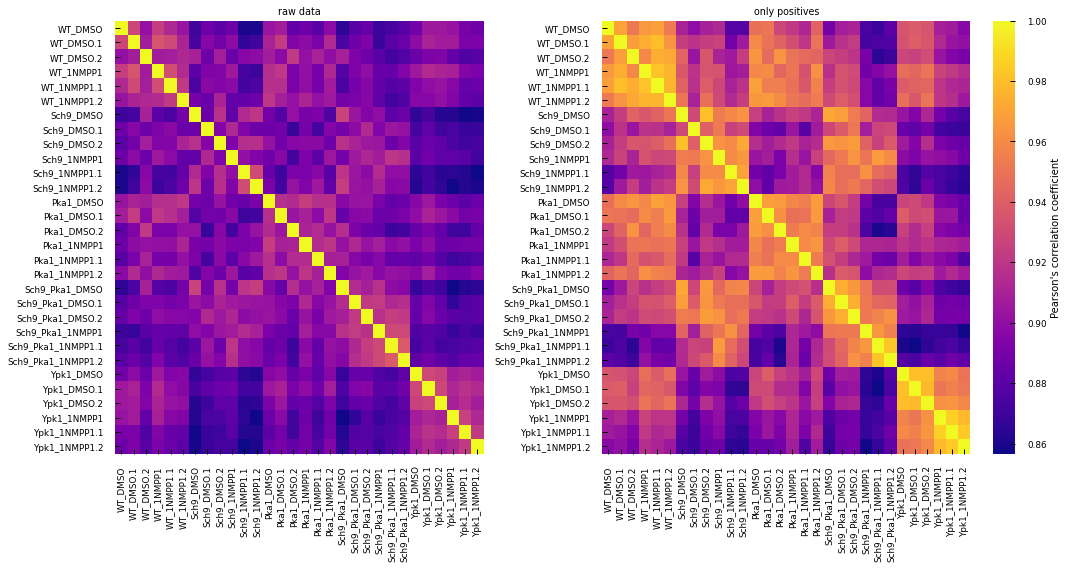

In [16]:
fig,axes = plt.subplots(1,2,gridspec_kw={'width_ratios': [0.8, 1]},
                        figsize=(15,8) )

sns.heatmap(X_ph.corr(),cmap='plasma',cbar=False, ax = axes[0])
axes[0].set_title("raw data")

sns.heatmap(X_ph_positive.corr(),cmap='plasma',cbar_kws={'label': "Pearson's correlation coefficient"} , ax = axes[1])
axes[1].set_title("only positives")

plt.tight_layout()

plt.show()

We see that for the raw data the replicates of the same mutant strain correlate and the mutant strain has a stronger effect than the treatment (1NMPP1 or DMSO).

Removing missing values in this case clearly improves the correlation between replicates and samples with a similar strain.

 For more imputation techniques check : [Scikit-learn imputation](https://scikit-learn.org/stable/modules/impute.html). There is abundant literature and sophisticated methods on missing value imputation. Unfortunately we cannot cover this important subject in this course.

**Micro exercise :** vixualize the correlation between samples on the data imputed with half the mimimum.

[back to the ToC](#toc)

### Making sure columns are the right type <a class="anchor" id="TY-bullet"></a>

In [17]:
df_ph.dtypes

Peptide sequence       object
Phosphosites           object
Standard name          object
WT_DMSO               float64
WT_DMSO.1             float64
WT_DMSO.2             float64
WT_1NMPP1             float64
WT_1NMPP1.1           float64
WT_1NMPP1.2           float64
Sch9_DMSO             float64
Sch9_DMSO.1           float64
Sch9_DMSO.2           float64
Sch9_1NMPP1           float64
Sch9_1NMPP1.1         float64
Sch9_1NMPP1.2         float64
Pka1_DMSO             float64
Pka1_DMSO.1           float64
Pka1_DMSO.2           float64
Pka1_1NMPP1           float64
Pka1_1NMPP1.1         float64
Pka1_1NMPP1.2         float64
Sch9_Pka1_DMSO        float64
Sch9_Pka1_DMSO.1      float64
Sch9_Pka1_DMSO.2      float64
Sch9_Pka1_1NMPP1      float64
Sch9_Pka1_1NMPP1.1    float64
Sch9_Pka1_1NMPP1.2    float64
Ypk1_DMSO             float64
Ypk1_DMSO.1           float64
Ypk1_DMSO.2           float64
Ypk1_1NMPP1           float64
Ypk1_1NMPP1.1         float64
Ypk1_1NMPP1.2         float64
dtype: obj

It is a good idea to check the dtype of you dataframe values and check whether they have the correct type. Here the types are correct, but if you wanted to change them you could use the following syntax:

In [18]:
df_ph["WT_DMSO"] = df_ph["WT_DMSO"].astype('float64')

[back to the ToC](#toc)

### One hot encoding of categorical data <a class="anchor" id="OH-bullet"></a>

Certain ML algorithms (linear models, SVMs, NNs) require numerical values. Ordered categorical features (e.g. size = small, medium, large) or features with just two values can just be enumerated (e.g. size = 1,2,3). However, unordered categorical features or factors (e.g. color = blue, gray, pink) need to be turned into orthogonal vectors of 0 and 1, where each index in the vector corresponds to a level of the factor (e.g. blue = (1,0,0), gray = (0,1,0) and pink = (0,0,1). This is the so-called OneHot encoding of categorical features.

For instance, let's consider the following toy dataset with 3 columns : 2 categorical and 1 ordinal.

In [19]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df

A  B  C
0  a  b  1
1  b  a  2
2  a  c  3

In [20]:
# method 1 : pd.get_dummies( ... )
pd.get_dummies( df )

C  A_a  A_b  B_a  B_b  B_c
0  1    1    0    0    1    0
1  2    0    1    1    0    0
2  3    1    0    0    0    1

In [21]:
# method 2 : sklearn OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat = df[['A','B']] # here we only perform the encoding with columns A and B
ohe = pd.DataFrame(enc.fit_transform(cat).toarray())

ohe.head()

0    1    2    3    4
0  1.0  0.0  0.0  1.0  0.0
1  0.0  1.0  1.0  0.0  0.0
2  1.0  0.0  0.0  0.0  1.0

You can choose to use one or the other depending on your needs, habits, and/or the format of your original data.

Note that there are **as many columns created as factor values**. This can lead to somewhat redundant/perfectly correlated columns (e.g. columns `A_a` and `A_b` are the converse of the one another) which can be detrimental. You can use the `drop_first=True` option of `pd.get_dummies` get rid of these "extra" columns:

In [22]:
pd.get_dummies( df , drop_first=True )

C  A_b  B_b  B_c
0  1    0    1    0
1  2    1    0    0
2  3    0    0    1

[back to the ToC](#toc)

# Enough with data processing let's start some real science

## Dimensionality reduction <a class="anchor" id="fourth-bullet"></a>

Dimensionality reduction serves two puposes
<ol>
<li><b>Visualization</b>: reducing the number of dimensions to 2 or 3 allows displaying the whole dataset for visual inspection</li>
<li><b>Data compression</b>: some features may be little informative and projecting feature vectors to the principal data manifold allows discarding the uninformative part of the feature space</li>
</ol> 

[back to the ToC](#toc)

### Principal Component Analysis (PCA) <a class="anchor" id="PCA-bullet"></a>

**PCA finds the direction in feature space with the largest variance (first principal component)**, meaning the direction where the data points are most spread out. Then it repeats the same algorithm to find the direction orthogonal to the first principal component (second principal component) with the largest (remaining) variance. The second principal component can only give information about the variance not explained by the first component. 

Mathematically this boils down to the eigenvalue decomposition or diagonalization of the covariance matrix, where the eigenvalue is the variance of the data along its eigenvector (principal component).

In PCA, we are looking for the matrix of eigenvalues $\pmb{D}$ and orthogonal basis vectors (eigenvectors) $\pmb{W}$, that satisfies the following relation:

$\pmb{X}^T\pmb{X}=\pmb{W}\pmb{D}\pmb{W}^T$

$\pmb{X}$ must be centered around the mean value of each feature vector (each column in the dataframe has zero empirical mean), so that $\pmb{Q}=\pmb{X}^T\pmb{X}$ is the covariance matrix of your multidimensional data (zero centering is done by the PCA algorithm, so no need to do it yourself).

> Note: algorithms that perfom PCA generally use Singular Value Decomposition (SVD). 

The output of such a process is a set of eigenvectors or PCs (which are a linear combination of your former features) and the variance corresponding to each eigenvector (eigenvalues).

![Pca](../images/PCA.png)

The eigenvalues are in decreasing order to give us their decreasing signficance to explain the overall variance. The Scikit-learn [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) has, as other scikit classes, two main methods: `fit()` and `transform()`. 

For a data matrix $\pmb{X}$ of size NxM (N data rows, M feature colums) 
 * `fit(X)` calculates $\pmb{W}$ (with the M PCs as columns) of $\pmb{X}$ 
 * `transform(X)` method provides the coordinates of the N data vectors in the eigenvector or principal component space by calculating $\pmb{X'}=\pmb{X}\pmb{W}$ (if the option `whiten=False`).

PCA analysis has a clear mathematical framework and is fast to calculate (compared to t-SNE, for example). It can be easily applied to distributed data and is therefore also attractive for very large datasets. It also serves as a preprocessing step to de-correlate or 'whiten' a data matrix (see Appendix).

If you would like to know what the function `PCA.transform()`, `PCA.fit()` or any other python function are doing exactly, it is a good idea to inspect the source code of these functions:

In [23]:
from sklearn.decomposition import PCA
import inspect

print(inspect.getsource(PCA.transform))

    def transform(self, X):
        """Apply dimensionality reduction to X.

        X is projected on the first principal components previously extracted
        from a training set.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New data, where n_samples is the number of samples
            and n_features is the number of features.

        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)

        Examples
        --------

        >>> import numpy as np
        >>> from sklearn.decomposition import IncrementalPCA
        >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
        >>> ipca = IncrementalPCA(n_components=2, batch_size=3)
        >>> ipca.fit(X)
        IncrementalPCA(batch_size=3, n_components=2)
        >>> ipca.transform(X) # doctest: +SKIP
        """
        check_is_fitted(self)

        X = self._validate_data(X, dtype=[np.float64, np.float32], reset=

[back to the ToC](#toc)

### PCA for the phospho-proteomic dataset <a id="PCAp-bullet"></a>

We will first perform the PCA on the raw data. 

Remember we have seen that the presence of missing values (represented by 0s here) impacted the correlation between samples. Thus we will pay particular attention to observations with missing values here.

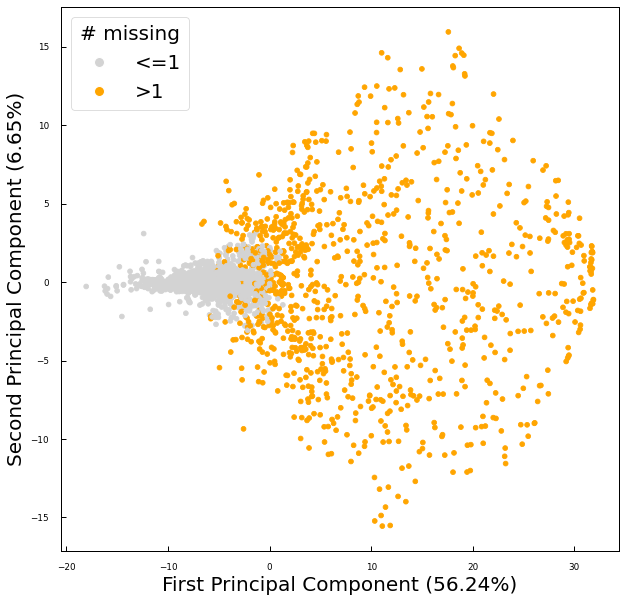

In [24]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA() #create an empty PCA object

pca.fit(X_ph) # calcultes variances (eigenvalues)) and principal components (eigenvectors)

x_pca = pca.transform(X_ph) # calculates coordinates of row vectors in X in PC space

## we will color points according to the amount of missing values:
# * at most 1 missing value : light grey
# * at least 2 missing values : orange
nr_missing = (X_ph==0).sum(axis=1)
mv_color=["lightgray" if mv_cnt<2 else "orange" for mv_cnt in nr_missing]

plt.figure(figsize=(10,10))
sca = plt.scatter(x_pca[:,0],x_pca[:,1],c=mv_color)
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

# produce a legend with the unique colors from the scatter
legend_elements = [Line2D([0], [0], marker='o', color='w', label='<=1',markerfacecolor='lightgrey', markersize=10),
Line2D([0], [0], marker='o', color='w', label='>1',markerfacecolor='orange', markersize=10)]
legend = plt.legend(handles = legend_elements , title='# missing' ,  prop={'size': 20})
legend.get_title().set_fontsize('20')

plt.show()

We see that the first two principal components explain more than 60% of the total variance. Yet, the missing values clearly drive this variance, as we can see the points with >1 missing value taking up most of the observed spread.

Discarding the peptides with missing values removes this variance:

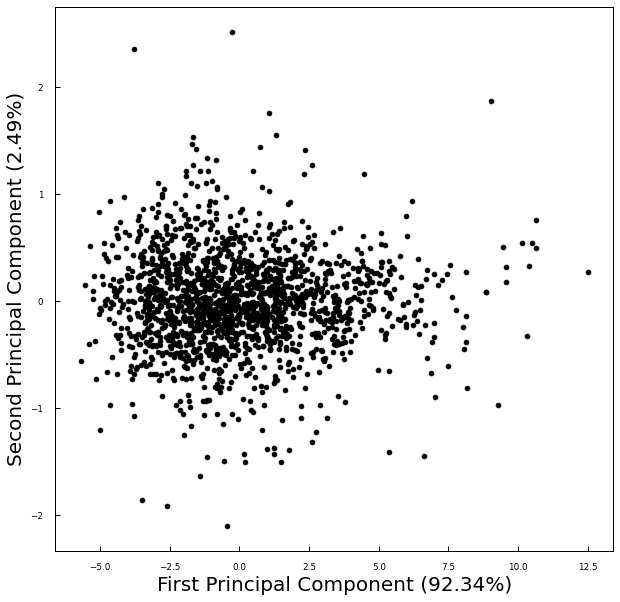

In [25]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA() #create an empty PCA object

pca.fit(X_ph_positive) # calcultes variances (eigenvalues)) and principal components (eigenvectors)

x_pca = pca.transform(X_ph_positive) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c='k')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

Now the **first PC explains 92% of the variance, i.e. the data is almost 1-dimensional!** What is going on? 

Inspection of the data shows that the peptides (rows) have different total intensities and the first PC just reflects this intensity difference.

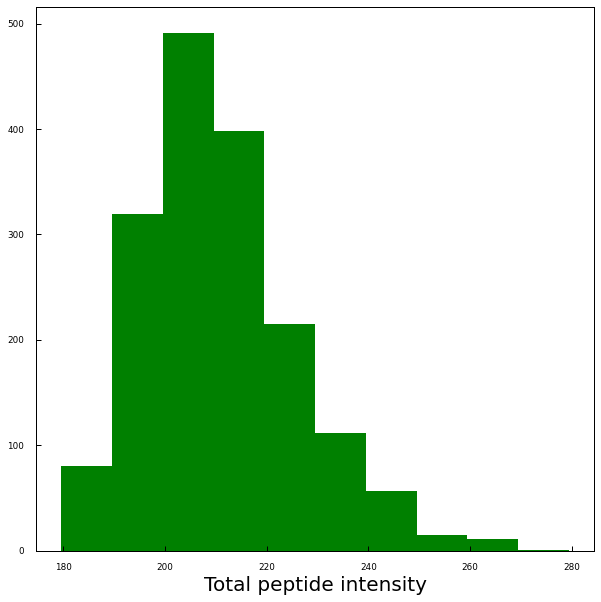

In [26]:
sns.set_context("paper", rc={"axes.labelsize":20})
pept_intens = X_ph_positive.sum(axis=1)
plt.figure(figsize=(10,10))
plt.hist(pept_intens, color="g")
plt.xlabel("Total peptide intensity")
plt.show()

> Remember that we log10-tranformed this data, so such differences in scale are very significant!

In this study we are not interested in the total peptide intensity, but only in the relative intensities between samples (columns). Therefore we can normailze the peptide rows and make sure that each row has a total intensity of 1.

> Remark: the PCA class has a 'whithen' parameter (see Appendix). However, it does not remove the intensity dependency here and and does not change the plot (try it yourself!).

This is a **recurrent problem with distance based algorithm like PCA :** it will pick difference of scale between the features, even though those are not significant for the biology you want to explain or, even worse, are simple artifacts of the data production methods (e.g. sequencing depth). 

[Back to ToC](#toc)

### Data rescaling for PCA or distance-based methods <a id='rescale'></a>

Your knowledge of your data will tell you if you need or not to rescale, if that scale difference is important for you or not. To illustrate this important matter let's look at the following toy dataset:

 * two classes
 * two dimensions, with a different scale

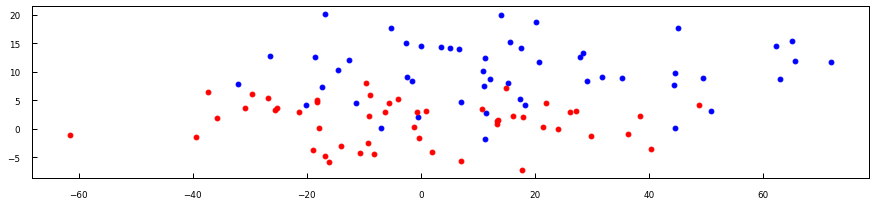

In [27]:
# creating some toy data : just two classes 
# that are explained by different scales along x and y and different means.
# (you don't need two for what I am trying to prove but for consistency I decided to use 2)
np.random.seed(4)
X1=np.zeros((50,2),dtype='f')
X2=np.zeros((50,2),dtype='f')
for i in range(50):
    X1[i][0]=np.random.randn()*25+10 #(one axis has a scale of 25)
    X1[i][1]=np.random.randn()*5+10 #(one axis has a scale of 5)
    X2[i][0]=np.random.randn()*25+-2
    X2[i][1]=np.random.randn()*5+2
X=np.vstack(np.array([X1,X2]))

# plotting
fig,ax=plt.subplots(1,1,figsize=(15,5))
plt.plot(X[:50,0],X[:50,1],'bo')
plt.plot(X[50:,0],X[50:,1],'ro')

# this ensures x and y have the same axis scale, so the plot reflect the difference in scale of the data
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

If you want to separate the red points from the blue points your intuition would tell you to draw an horizontal line somewhere around $y=4$. 

Can the PCA help us do better than that? 

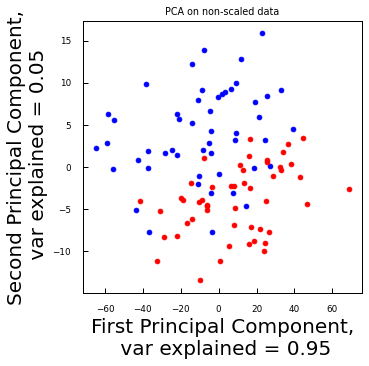

In [28]:
pca = PCA()#create a PCA object

pca.fit(X)#calculate the eigenvalues and eigenvectors according to data

x_pca = pca.transform(X)# Calculate the new points coordinates according to the previously found eigenvectors.
var_explained=pca.explained_variance_ratio_
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:50,0],x_pca[:50,1],color='b')
plt.scatter(x_pca[50:,0],x_pca[50:,1],color='r')
plt.title('PCA on non-scaled data')
plt.xlabel('First Principal Component,\n var explained = {0:.2f}'.format(var_explained[0]))
plt.ylabel('Second Principal Component,\n var explained = {0:.2f}'.format(var_explained[1]))

plt.show()

If you don't rescale you might have the impression that 95 % (see `First principal component, var explained=0.95`) of your variance comes from the first component and so that your data is almost one dimensional... 
In fact by construction you know that it is not true and the only thing that you are measuring is the difference of scales in the data.

Even worse : you could have an intuition of where to cut to split qualitatively your data but now your PCA is telling that the inner organization of the data doesn't follow your intuition (your intuition tells you to do it along the second axis, but the PCA tells you that this not how your data are primarily organized...).

However, see what happens if you scale your data before the PCA:

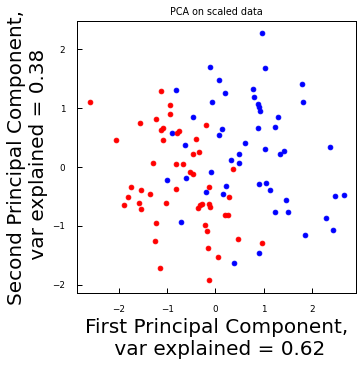

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #define the scaler object
scaler.fit(X) 
scaled_data = scaler.transform(X)
pca = PCA()#create a PCA object

pca.fit(scaled_data)#calculate the eigenvalues and eigenvectors according to rescaled data

x_pca = pca.transform(scaled_data)# Calculate the new points coordinate according to the previously found eigenvectors.
var_explained=pca.explained_variance_ratio_
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:50,0],x_pca[:50,1],color='b')
plt.scatter(x_pca[50:,0],x_pca[50:,1],color='r')
plt.title('PCA on scaled data')
plt.xlabel('First Principal Component,\n var explained = {0:.2f}'.format(var_explained[0]))
plt.ylabel('Second Principal Component,\n var explained = {0:.2f}'.format(var_explained[1]))

plt.show()

**When you rescale you realize that the two dimensions are actually fairly equivalent**, and your intuitive cutting follows a perfect linear combination of those two equivalent dimensions!

**Back to the phospho proteomic data**

In [30]:
pept_intens

Peptide sequence
ADDEEDLS(Phospho)DENIQPELR                   242.553289
SNS(Phospho)IDYAK                            207.205189
KEPVKTPS(Phospho)PAPAAK                      224.212664
NEKS(Phospho)PAQLWAER                        189.719837
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK    210.267863
                                                ...    
NEAT(Phospho)PEAEQVKK                        211.750359
NEAT(Phospho)PEAEQVKKEEQNIADGVEQK            247.140964
NNS(Phospho)DDETEHTSAIK                      202.309528
RKS(Phospho)EGECCDLNK                        223.845915
NHTWS(Phospho)EFER                           267.889545
Length: 1699, dtype: float64

In [31]:
X_ph_positive.div( pept_intens , axis = 0).sum(axis=1)

Peptide sequence
ADDEEDLS(Phospho)DENIQPELR                   1.0
SNS(Phospho)IDYAK                            1.0
KEPVKTPS(Phospho)PAPAAK                      1.0
NEKS(Phospho)PAQLWAER                        1.0
NVASGAPVQKEEPEQEEIAPSLPSRNS(Phospho)IPAPK    1.0
                                            ... 
NEAT(Phospho)PEAEQVKK                        1.0
NEAT(Phospho)PEAEQVKKEEQNIADGVEQK            1.0
NNS(Phospho)DDETEHTSAIK                      1.0
RKS(Phospho)EGECCDLNK                        1.0
NHTWS(Phospho)EFER                           1.0
Length: 1699, dtype: float64

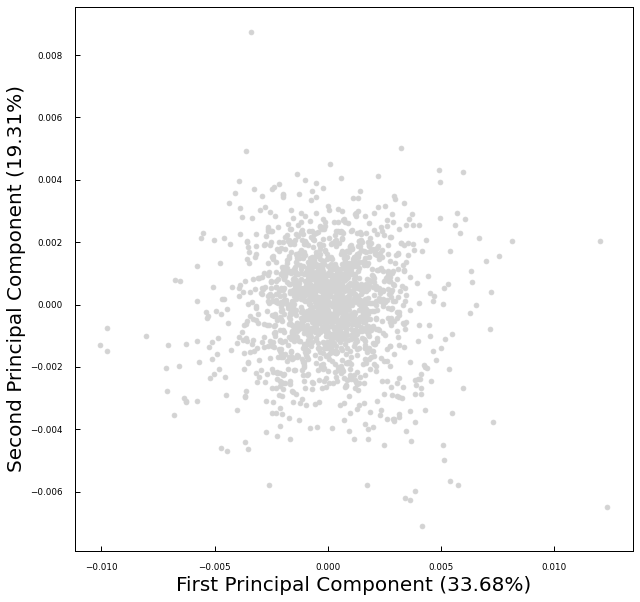

In [32]:
sns.set_context("paper", rc={"axes.labelsize":20})
pca = PCA() #create an empty PCA object

### here, our scaling will be to divide each row by its row sum 
### (ie. normalize each peptide by its intensity across all samples)
pept_intens = X_ph_positive.sum(axis=1)

X_ph_norm = X_ph_positive.div(pept_intens, axis=0)

pca.fit(X_ph_norm) # calcultes variances (eigenvalues)) and principal components (eigenvectors)
x_pca = pca.transform(X_ph_norm) # calculates coordinates of row vectors in X in PC space

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

We see that the variance along the first PC is now reduced to 34%. Now the PCA plot does not tell us much about the data. We can get more information by plotting the directions that correspond to the individual treatments. We can get the treatment directions via `pca.components_`, which is our MxM matrix $\pmb{W}^T$ (M = number of columns, features or treatments) where each row holds the PC coordinates in feature space and each column the treatment coordinates in PC space. 

The rows of `pca.components_` are ordered by decreasing variance. 

The visualization of this matrix also reveals that the componenents of first 5 PC show good agreement between replicates, and afterwards the PC components become noisy.

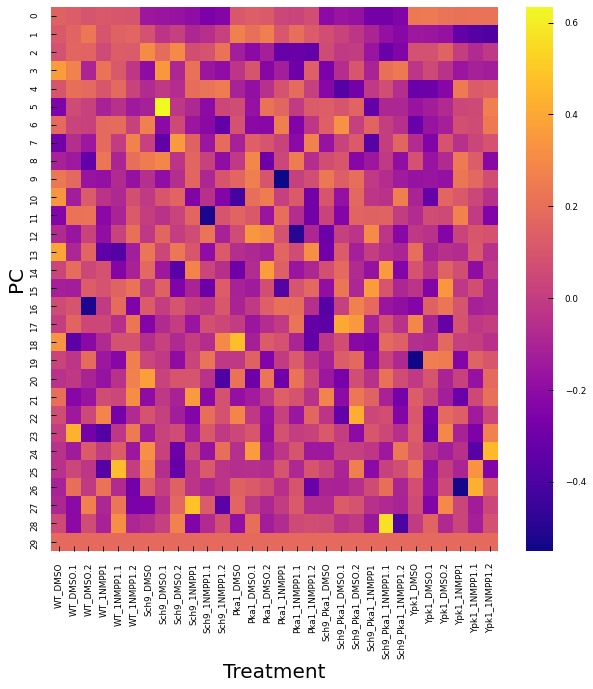

In [33]:
sns.set_context("paper", rc={"axes.labelsize":20})
df_comp = pd.DataFrame(pca.components_,columns=X_ph.columns)
plt.figure(figsize=(10,10))
sns.heatmap(df_comp,cmap='plasma')
plt.xlabel("Treatment")
plt.ylabel("PC")
plt.show()

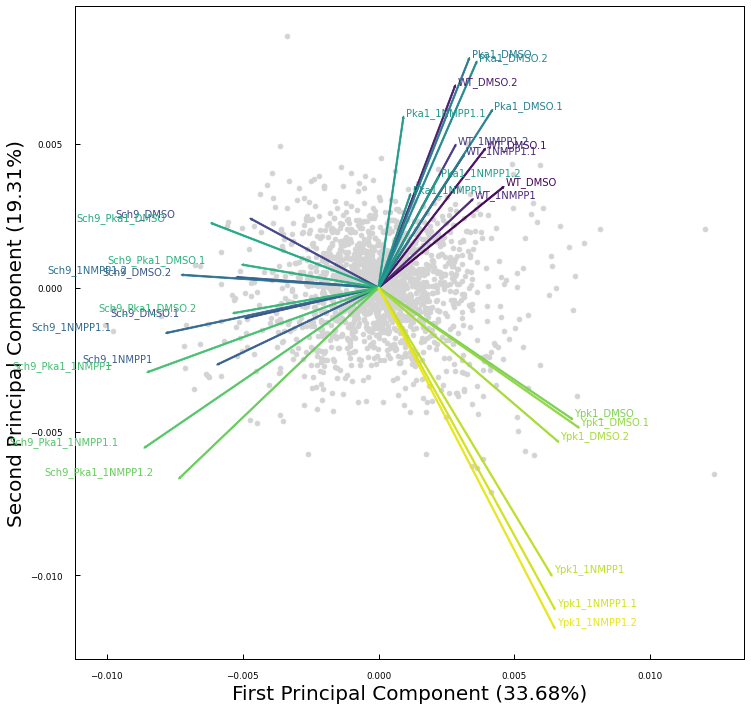

In [34]:
sns.set_context("paper", rc={"axes.labelsize":20})
plt.figure(figsize=(12,12))
plt.scatter(x_pca[:,0],x_pca[:,1],c='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))

feature_vectors = pca.components_.T
arrow_size = 0.03

# projections of the original features
cmap = cm.get_cmap('viridis')
n = feature_vectors.shape[0]
for i, v in enumerate(feature_vectors): # enumerate over the rows of feature_vectors
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], head_width=0.00008, head_length=0.00008, width=0.00005,
              color=cmap((1.0 * i) / n))
    text_pos = -0.005 if v[0] < 0 else 0.0001
    plt.text(v[0]*arrow_size+text_pos, v[1]*arrow_size+0.0001, X_ph.columns[i], 
            color=cmap((1.0 * i) / n),fontsize=10)
    

plt.show()


We see now that the Ypk1 mutants cluster together and 1NMPP1 treatments are distinct from DMSO control. Pka1 clusters with the WT strains and there is less difference between treatment and control. Sch9 and Sch9_Pka1 are similar indicating the Sch9 mutant effect is stronger than the Pka1. Overall the mutant effect seems stronger than the treatment effect.

[Back to ToC](#toc)

## Exercise: PCA <a id="exo-pca"></a>

**Another dataset : AML**

In the following dataset from [Tyner et al. 2018](https://doi.org/10.1038/s41586-018-0623-z) we have the expression level of some genes from some different Acute Myeloid Leukaemia (AML) tumors as well as how they respond to treatment (AUC value). 

Between those different tumors there are probably different mutations occuring in different genes.

In [35]:
df_aml=pd.read_excel('../data/gene_drug_sens.xlsx')

## let's keep only the expression data as well as the response to treatments (auc)
X_aml=df_aml[df_aml.columns[9:]]
X_aml.head()

CD86    FAM49A      ERMN      CHD5  RP11-333E13.2    KLHDC3      HNMT  \
0 -1.120073 -0.148654 -1.579624 -0.756073       0.471452  1.068268 -0.157964   
1  2.498957 -1.015880 -0.859471 -0.555560      -0.142550 -0.161521  2.279642   
2  0.176687 -0.490400 -0.611194 -0.443875       0.876031 -0.147330  0.112438   
3  0.918236  0.377131 -0.410336 -0.033461      -0.014791  1.218267  1.122505   
4 -1.004299 -0.826399  0.995739 -1.426430      -0.053345  0.585897 -0.876732   

      ADAP2    B3GNT2  RP11-196G18.24      TLR2    MIR223   RAB43P1      GYPC  \
0 -1.001751  1.556003       -1.608982  0.751515  0.987769  0.232332  0.981147   
1 -0.933841 -0.189892        0.313041  2.097701 -1.627445 -0.961402 -0.523684   
2 -0.185127  0.235198       -1.389968  0.007096  1.291810 -0.504791  0.813038   
3 -0.333728  0.038227       -0.187054 -0.376509  0.826023  0.847269 -0.466044   
4  0.564804 -0.835560       -0.566891  0.546441 -0.371254  1.609191  0.220240   

   HSD17B13   HNRNPA1     NAPSB  
0 -2.021119 -1.185687 -0.710025  
1  0.255906  0.885343  0.900553  
2 -0.741312 -1.180863 -2.541507  
3  0.374157  0.585562 -0.747859  
4 -2.180800  1.076900  0.411095

In [36]:
# you access the AUC using 
df_aml.auc

0     257.569985
1     168.267467
2     271.034652
3     286.109498
4     261.794860
         ...    
85    135.218527
86    278.970613
87    124.302935
88    174.745142
89    259.485443
Name: auc, Length: 90, dtype: float64

You can presume that the missing values and data normalization for the gene expression have already been handled.

Perfom a pca on the gene expressions. Choose an interesting number of dimension and interpret the plot : 

 * What does the first component stand for? 
 * What are driving genes behind the first components? 
 

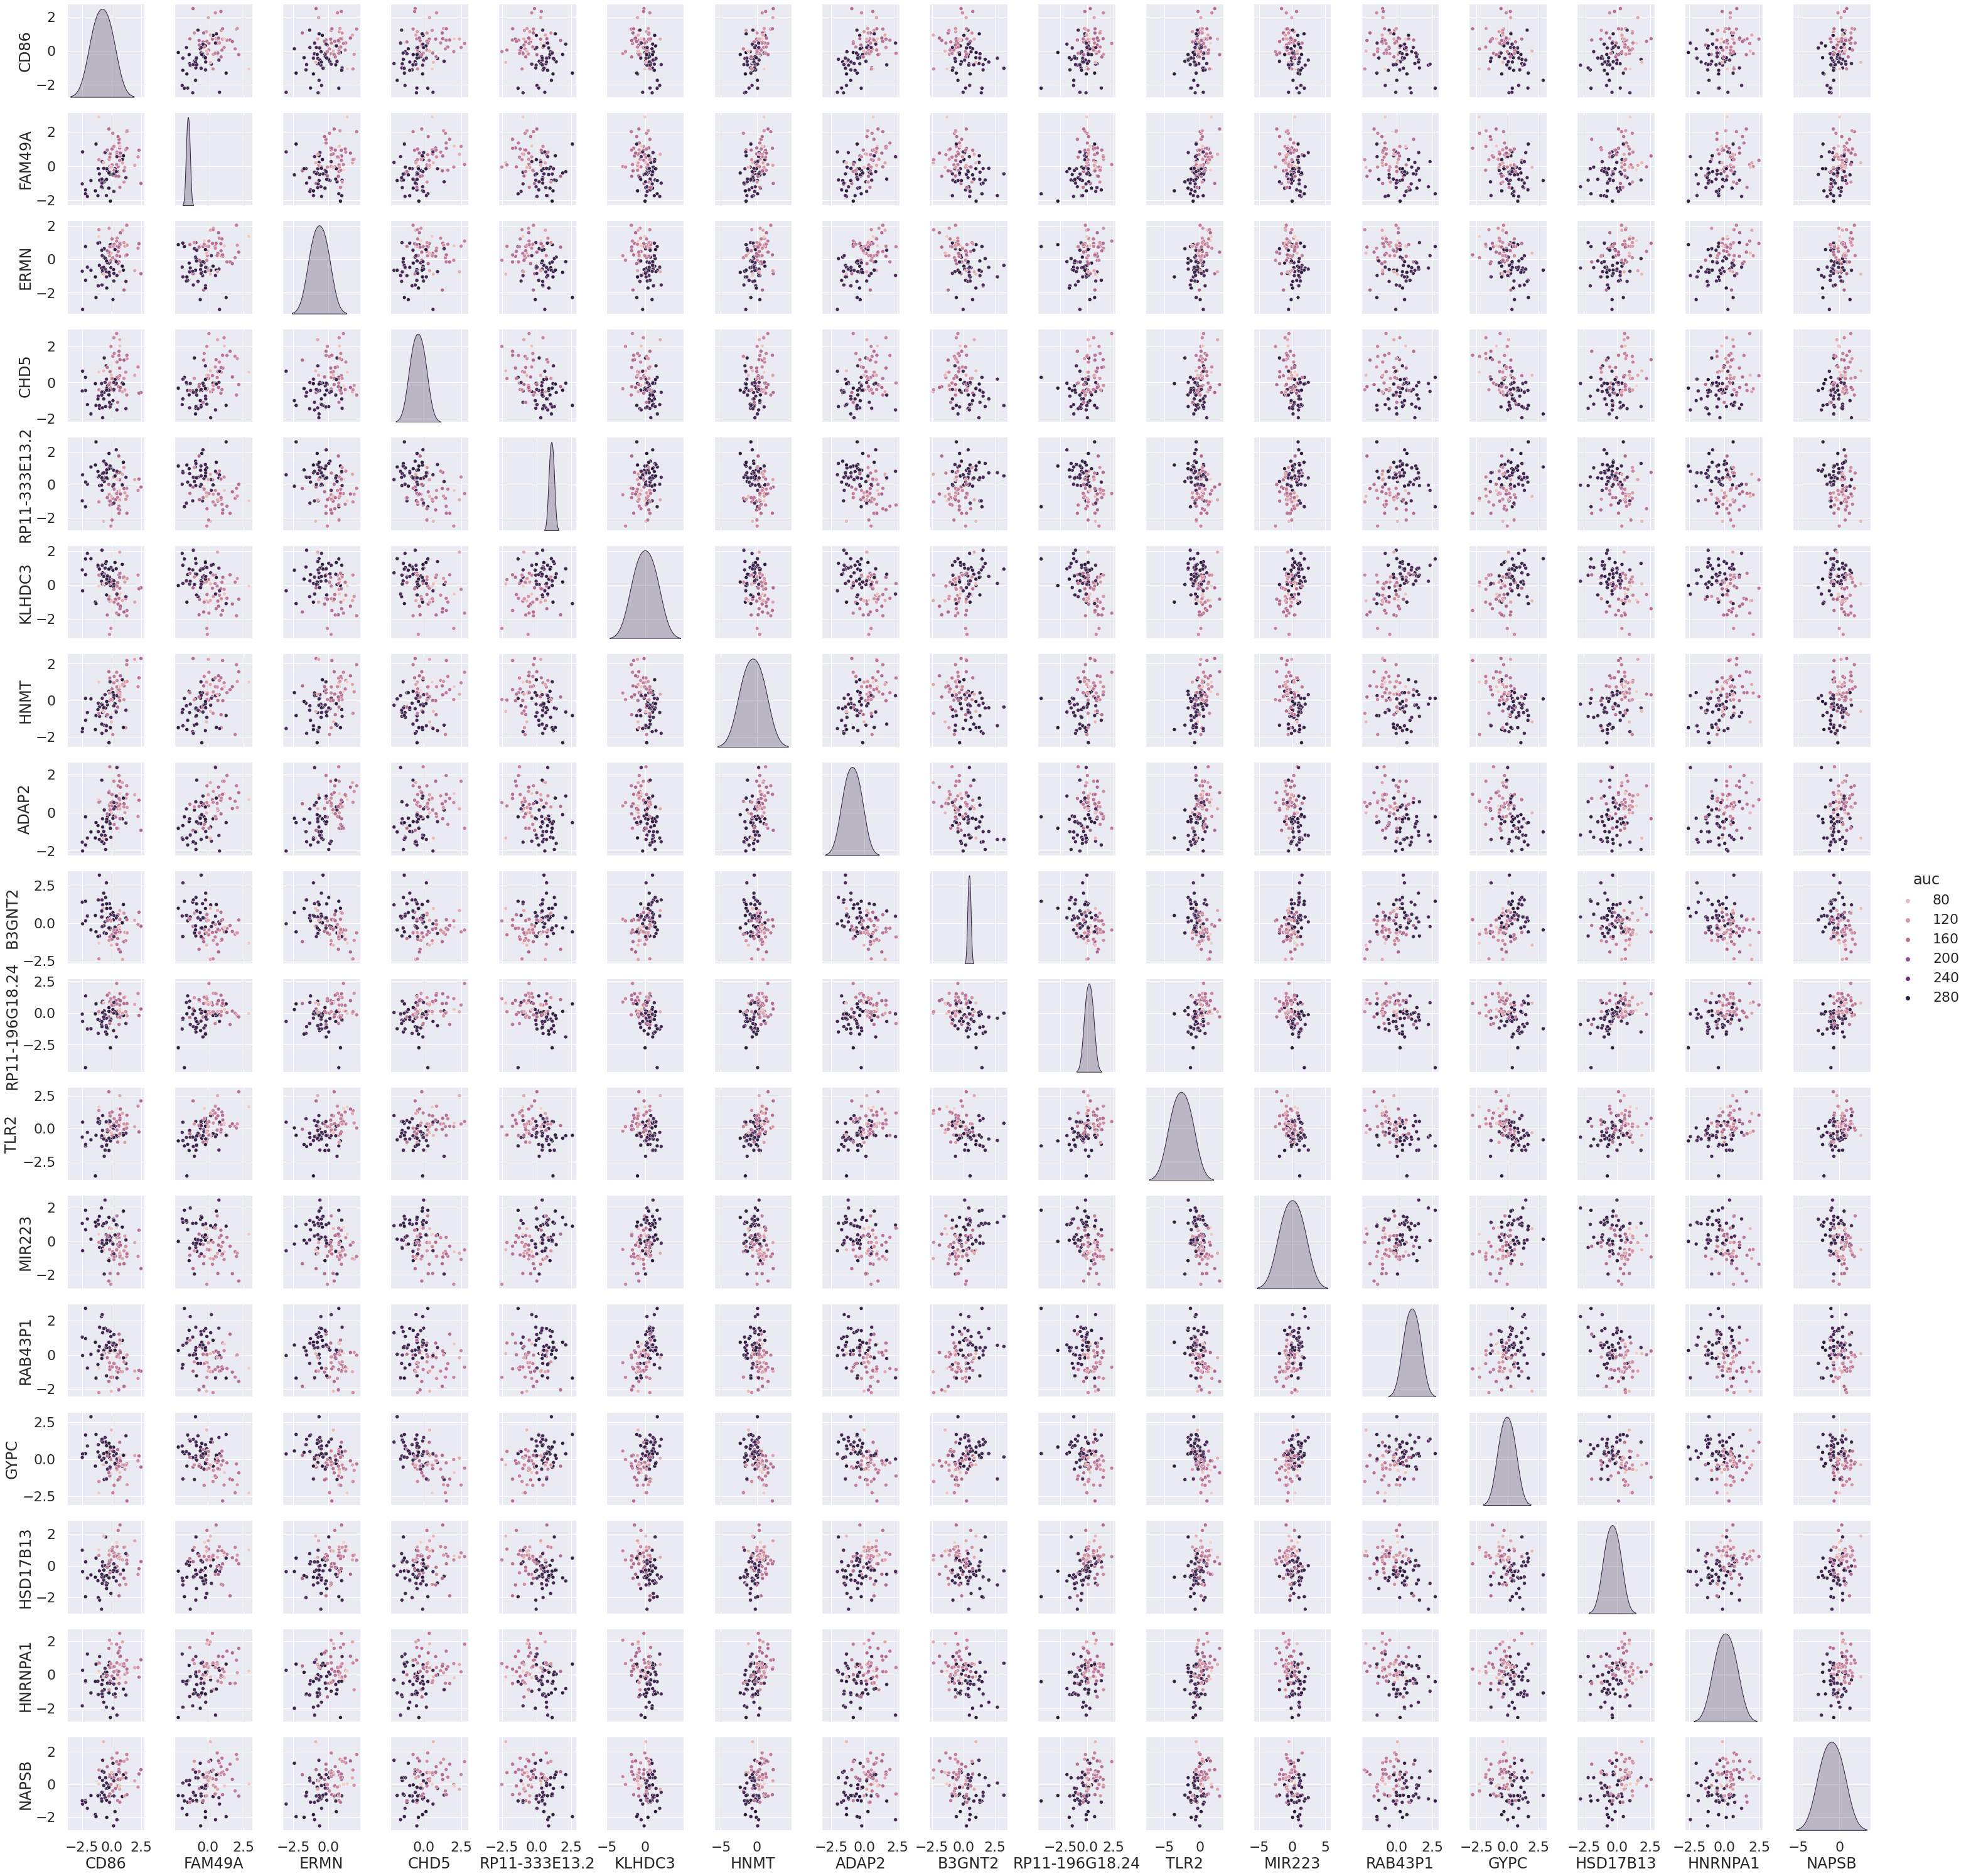

In [37]:
sns.set_context("paper", rc={"axes.labelsize":20})
sns.set(font_scale = 2)
sns.pairplot(df_aml,hue='auc')

In [43]:
# %load solutions/solution_01_pca.py

[Back to ToC](#toc)

### t-SNE <a class="anchor" id="tsne-bullet"></a>

t-SNE (t-distributed Stochastic Neighbourhood Embedding) is a dimensionality reduction algorithm introduced by [Maaten and Hinton, 2008](https://www.jmlr.org/papers/v9/vandermaaten08a.html). Unlike PCA or ICA it is not a linear method. 

#### A little bit of mathematics:

t-SNE assumes that in the high dimensional data points are normally distributed with variances $\sigma_i^2$. Namely distance between points $\bf{x_i}$ and $\bf{x_j}$ is represented as: 

$p_{i|j}=\frac{exp(-||x_{i}-x_{j}||^2/(2\sigma_i^2))}{\sum_{k\neq_i}exp(-||x_{i}-x_{k}||^2/(2\sigma_i^2))}$

For the representation in the low dimensional space, t-SNE uses a heavy tailed t-distribution, which does not penalize large distances much. This gives us the flexibility needed to stretch the high dimensional data onto a low dimensional space and will allow better visual separability of the clusters. 

$q_{i|j}=\frac{(1+||y_{i}-y_{j}||^2)^{-1}}{\sum_{k\neq_i}(1+||y_{i}-y_{k}||^2)^{-1}}$

t-SNE forces these two distributions to be as close as possible for a "good" representation. As the similarity measure between the $P_i$ and $Q_i$ distributions they use the Kullback-Leibler divergence:

$C=\sum_{i}KL(P_i||Q_i)=\sum_{i}\sum_{j}p_{i|j}log(\frac{p_{i|j}}{q_{i|j}})$

If the $\sigma_i^2$ values are known t-SNE finds a local minimum in $C({y_i})$ by a gradient descent algorithm. In order to fix the $\sigma_i^2$ values t-SNE uses the 'perplexity' parameter:

$Perp(x_i)=2^{-\sum_{j}p_{j|i}log(p_{j|i})}$

![Pca](../images/tsne.png)

The higher the `perplexity`, the higher the entropy and the larger $\sigma_i$. `perplexity` therefore reflects the  number of neighbors to consider for the calculation of $p_{i|j}$. A constant perplexity ensures that each point will consider approximately the same number of neighbours.

Finally, **t-SNE conserves neither distances nor densities : it is only a visualization technique and should not be used with other clustering techniques that require distance or density conservation between full and reduced space**.

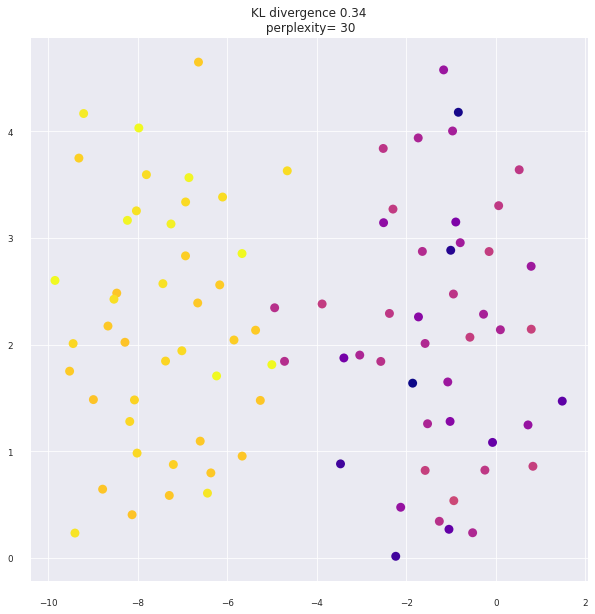

In [45]:
from sklearn.manifold import TSNE

perplexity = 30
#create the T-SNE object and fit the data
tsne=TSNE(n_components=2,perplexity=perplexity).fit(X_aml)

## plot the t-SNE projected data
X_embedded = tsne.embedding_#project the data to the new manifold using the fitted function found before
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df_aml.auc, s=80, lw=0,cmap='plasma')
plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne.kl_divergence_,perplexity),fontsize=12)
plt.show()


Making a direct correspondance between the new and the former dimensions is not straightforward since the transformation is non-linear and dependent on the position in the reduced space. 

Yet to get a feeling about what the features represent you can color code the feature values and see how they change in the transformed space.

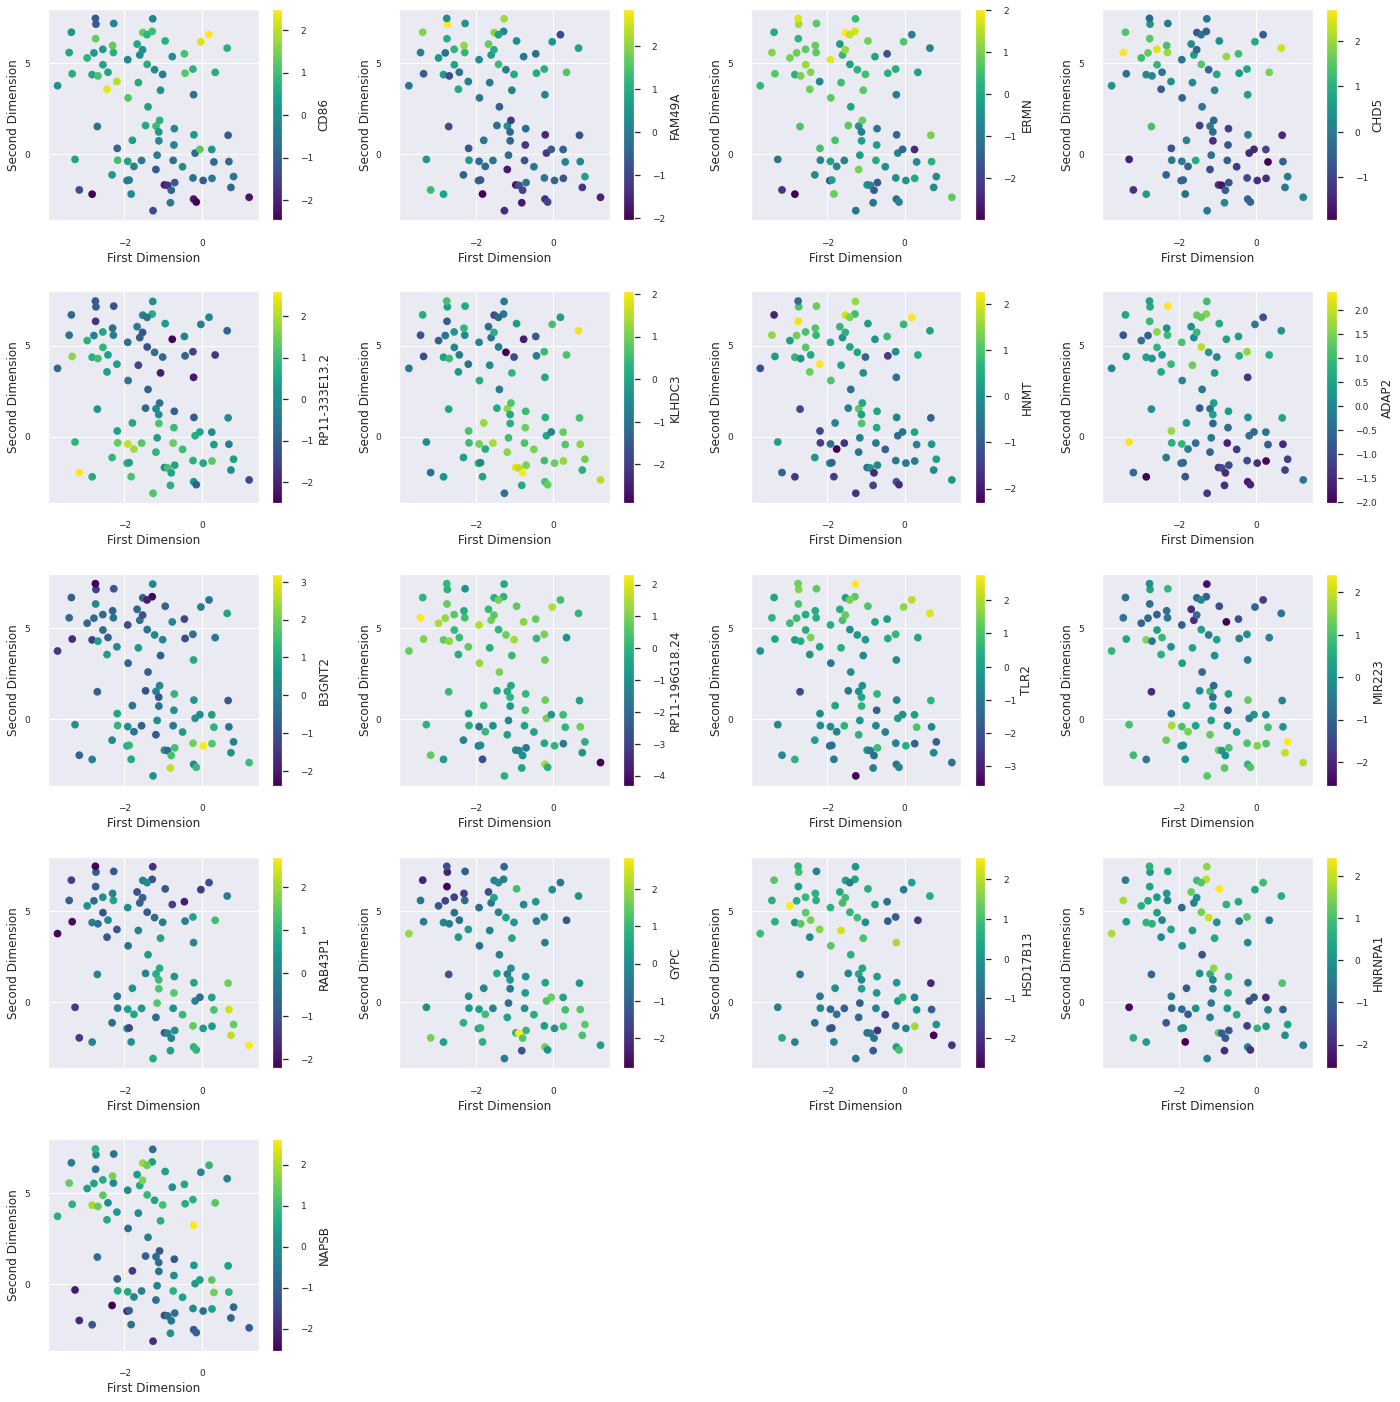

In [60]:
## color the projected data according to the different molecules 
plt.figure(figsize=(20, 20)) 
j = 1
for cl in X_aml.columns:
    plt.subplot(5,4,j)
    sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_aml[cl], s=60, lw=0,cmap='viridis')
    plt.xlabel('First Dimension',fontsize=12)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel('Second Dimension',fontsize=12)
    cb = plt.colorbar(sc)
    cb.set_label(cl,fontsize=12)
    cb.ax.tick_params(labelsize=9)
    #plt.title('tSNE scaled immunology data',fontsize=10)
    j += 1
plt.tight_layout()
plt.show()

The **perplexity parameter determines the topology of the results**. It is important to pick one that fits the structure of your data:

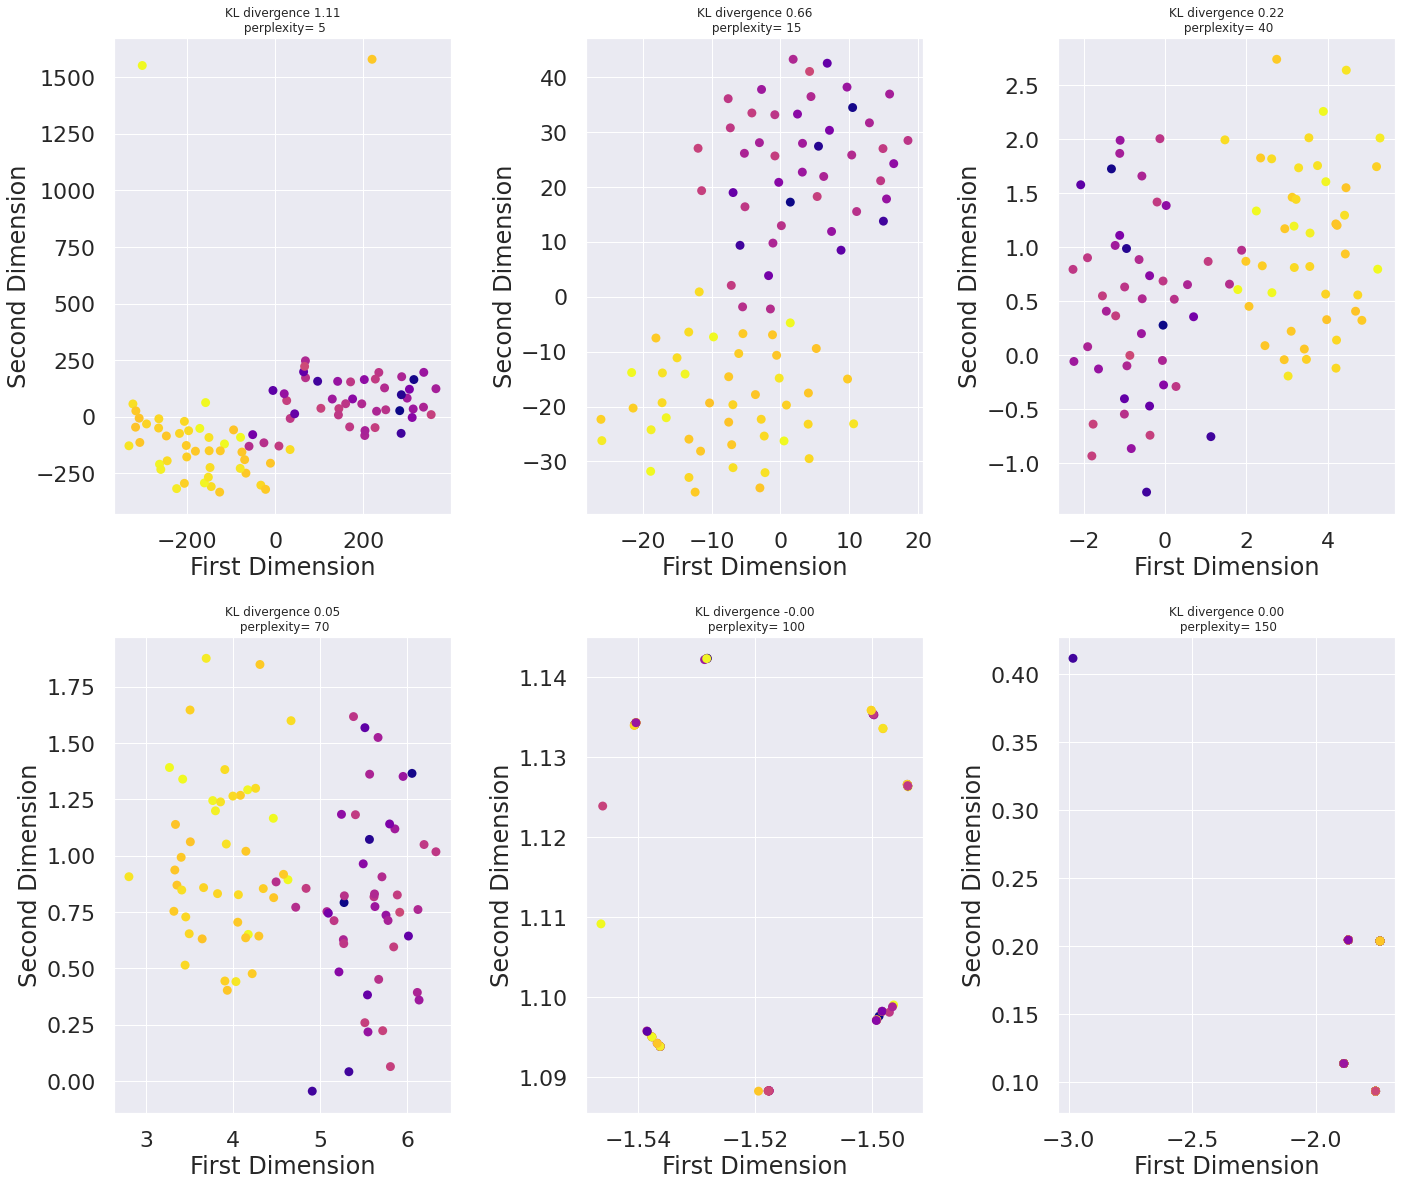

In [61]:
p=[5,15,40,70,100,150] #perplexity parameters to test

plt.subplots(figsize=(20,17))

for j in range(len(p)):
    plt.subplot(2,3,j+1)
    tsne2=TSNE(n_components=2,perplexity=p[j]).fit(X_aml)#create the T-SNE object and fit the data

    X_embedded2 = tsne2.embedding_#project the data to the new manifold using the fitted function found before
    plt.scatter(X_embedded2[:, 0], X_embedded2[:, 1], c=df_aml.auc, s=80, lw=0,cmap='plasma')
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    plt.title('KL divergence {0:.2f}\n perplexity= {1}'.format(tsne2.kl_divergence_,p[j]),fontsize=12)
plt.tight_layout()
plt.show()

It is your responsibility to pick a perplexity parameter that gives the best representation of your data. For more details I highly encourage everybody to take a look at this [article](https://distill.pub/2016/misread-tsne/).

Last but not least, the **t-SNE algorithm is stochastic and consequently results may vary from execution to execution**. You can execute the above cell a couple of time to assess the effects.


[Back to ToC](#toc)

# Clustering <a class="anchor" id="fifth-bullet"></a>

Clustering is an unsupervised method that serves many puposes:

<ol>
<li>Pattern detection: discover hidden patterns in your data</li>
<li>Compression: replace all cluster members by one representive</li>
<li>Data augmentation: replace noisy feature vectors by the cluster consensus vector</li>
<li>Dimensionality reduction: replace a feature vector by cluster similarities</li>
<li>Outlier detection: detect feature vectors far away from cluster centers</li>
<li>Semisupervised learning: assign cluster labels to unlabeled cluster members</li>
<li>...</li>
</ol>

If you find some cluster-like structures in your data and if they correspond to one of your hypothesis then you already came a long way. 
It is rare to get there in a single step: you need to carefully clean and normalize your data to discover these structures. 

Be aware that clustering algorithms are not magical techniques that give you a straight answer: you will need to **find good hyperparameters** for the model to work, and **your expertise and understanding of the data is crutial** to obtain good results.

[Back to ToC](#toc)

## K-means clustering <a class="anchor" id="Kmeans-bullet"></a>

The [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) algorithm is a widely used clustering algorithm. The K-means algorithm aims at finding the right partition of the data ($\pmb{X_1},...,\pmb{X_n}$) into $K$ clusters $\pmb{C}={C_1,...,C_K}$ so that the within cluster sum of squares (inertia) is minimized:

$\pmb{C}=argmin_{\pmb{C}} \sum_{k=1}^{K}\sum_{i \in C_k}||\pmb{X_i}-\pmb{\mu_k}||^2$

$\pmb{\mu_k}=\frac{1}{|C_k|}\sum_{i \in C_k}\pmb{X_i}$

K-means requires the number of clusters as input. The greedy algorithm consists of 3 main parts:
<ol>
<li>Choose $K$ points from $\pmb{X_i}$ as initial values for $\pmb{\mu_k}$. These initial points should be spread out over the dataset</li>
<li>Assignment step: assign each $\pmb{X_i}$ to a cluster $C_k=argmin_{C_k} ||\pmb{X_i}-\pmb{\mu_k}||^2$ </li>
<li>Update step: recalculate $\pmb{\mu_k}=\frac{1}{|C_k|}\sum_{i \in C_k}\pmb{X_i}$</li>
<li>Iterate steps 2 & 3 until convergence</li>
</ol>

![kmean1](../images/Kmeans1.png)
![kmean2](../images/Kmeans2.png)

For data with a cluster structure K-means complexity is often linear in the number of datapoints $\pmb{X_i}$ and it requires little additional memory. The data can be split into different chunks and the algorithm still works. Faster versions of the basic algorithm are available, e.g. [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans). This makes it an **attractive algorithm for very large datasets**.


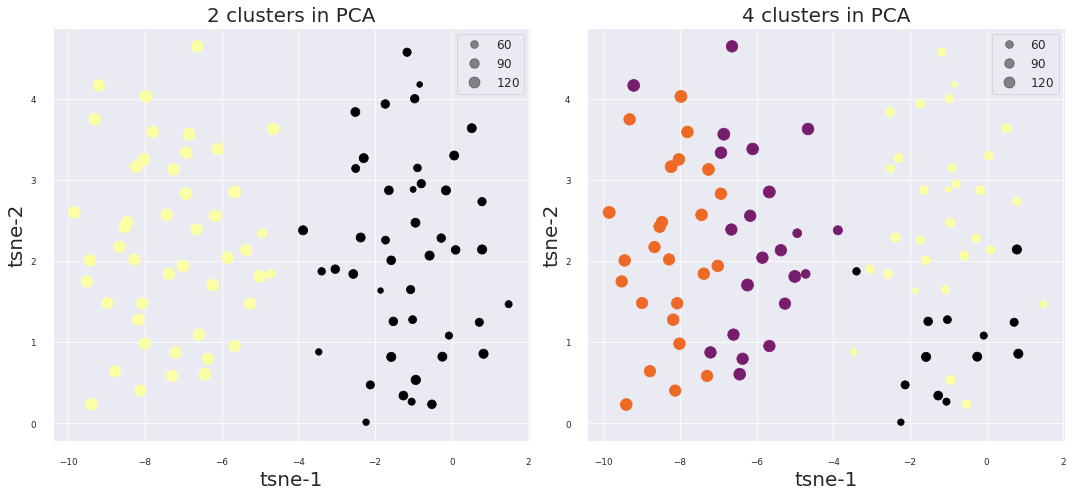

In [61]:
from sklearn import cluster

pca = PCA()
x_pca = pca.fit_transform(X_aml) # calculates coordinates of row vectors in X in PC space


kmeans_2 = cluster.KMeans(2)#create a K means clustering object that will have 2 clusters
kmeans_2.fit(x_pca)

kmeans_4 = cluster.KMeans(4)#create a K means clustering object that will have 4 clusters
kmeans_4.fit(x_pca)


## let's plot the clustering result on the t-SNE embedded data
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
sc1=plt.scatter(X_embedded[:,0],X_embedded[:,1],
                c=kmeans_2.labels_,s=df_aml.auc/2,cmap='inferno')
plt.xlabel('tsne-1',fontsize=20)
plt.ylabel('tsne-2',fontsize=20)
plt.title('2 clusters in PCA',fontsize=20)
plt.legend(*sc1.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)

plt.subplot(1,2,2)
sc2=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans_4.labels_,s=df_aml.auc/2,cmap='inferno')
plt.xlabel('tsne-1',fontsize=20)
plt.ylabel('tsne-2',fontsize=20)
plt.title('4 clusters in PCA',fontsize=20)
plt.legend(*sc2.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)
plt.tight_layout()

plt.show()

K-means is a greedy algorithm, i.e. it will only find a local minimum of the inertia. Therefore it is **good practice to run the algorithms several times with different initialization** (random_state set to different values).

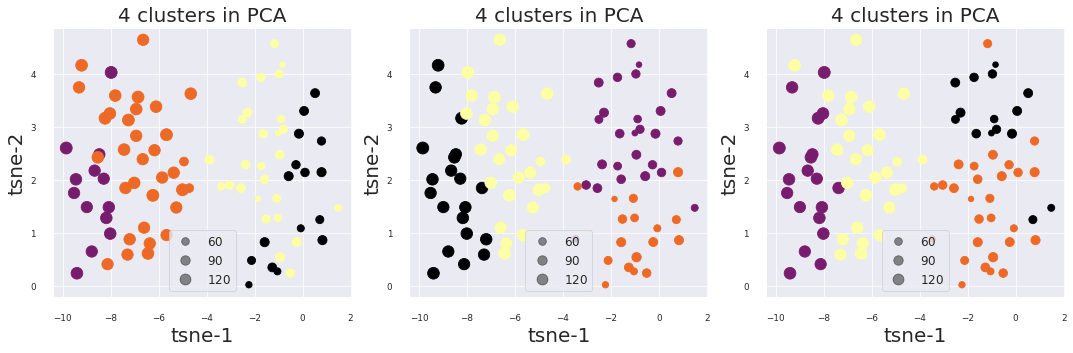

In [65]:
## let's perform several clustering
plt.subplots(figsize=(15,5))

for i in [1,2,3]:
    kmeans_4 = cluster.KMeans(4)#create a K means clustering object that will have 4 clusters
    #kmeans_4 = cluster.KMeans(4, random_state=42) #fix the random_state for reproducibility
    kmeans_4.fit(x_pca)

    # plot
    plt.subplot(1,3,i)
    sc2=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans_4.labels_,s=df_aml.auc/2,cmap='inferno')
    plt.xlabel('tsne-1',fontsize=20)
    plt.ylabel('tsne-2',fontsize=20)
    plt.title('4 clusters in PCA',fontsize=20)
    plt.legend(*sc2.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)
    plt.tight_layout()
plt.show()

Anyway, we see that the number of clusters defines the k-means clustering outcome. 

It is difficult to say by looking at the t-SNE projections, whether 2 or 4 clusters yield a better view of  underlying patterns in the data. 

Another way to find the 'optimal' number of clusters is to use any of the clustering quality metrics provided by [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Here we will use the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) metric: 

The silhouette score is calculated using the mean intra-cluster distance $a$
and the distance between a sample and the nearest cluster that the sample is not a part of : $b$. 

The Silhouette score for a sample is $SC=\frac{(b - a)}{max(a, b)}$.

The sklearn function `silhouette_score` returns the mean Silhouette score over all samples for a given clustering result. To obtain the values for each sample, use `silhouette_samples`. $SC$ is always between -1 (bad clustering) and 1 (perfect clustering).

So the **silhouette score should be maximized**.

> Warning : some score should be maximized and some other minimized. Be sure you know which one it should be before interpreting your results!

best K : 3


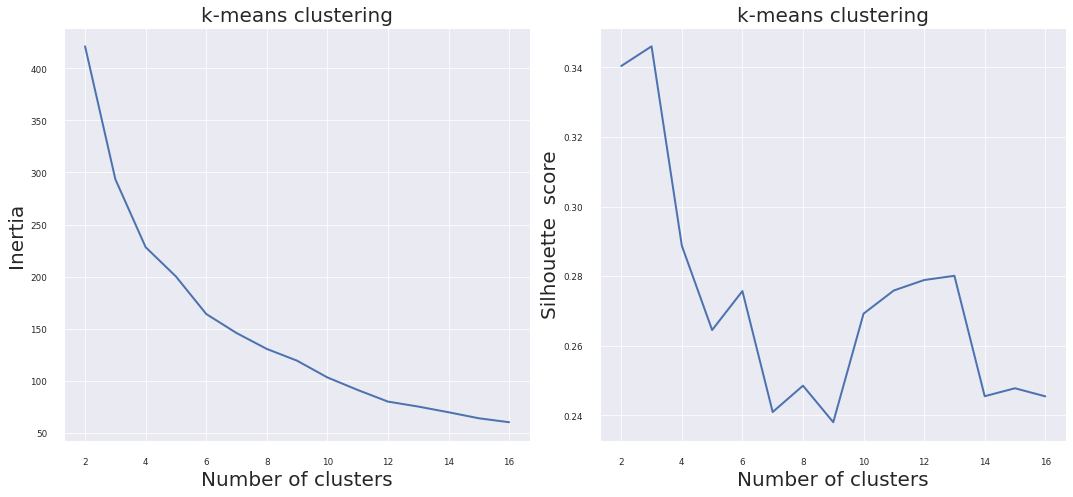

In [75]:
from sklearn import cluster
from sklearn.metrics import silhouette_score



def getSilhouetteProfile( X , nb_clusters ):
    """
    Takes:
        - X (np.array | pd.DataFrame): data to perform the clustering. Preferably scaled or from a pca
        - nb_clusters (iterable): list containing the different number of clusters to test
    
    Returns:
        (tuple) : (list) : inertia values corresponding to each number of clusters values
                  (list) : silhouette values corresponding to each number of clusters values
                
    """

    inertias = []
    silhouettes = []
    for n in nb_clusters:
        kmeans = cluster.KMeans(n)
        kmeans.fit(x_pca)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(x_pca,kmeans.labels_))
    return inertias , silhouettes



nr_clusters = np.arange(15)+2
inertias , silhouettes = getSilhouetteProfile( X , nr_clusters )

## getting the K with maximum silhouette
bestI = np.argmax( silhouettes )
bestK = nr_clusters[bestI]
print('best K :',bestK)

plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, inertias, ls="-", lw=2)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Inertia',fontsize=20)
plt.title('k-means clustering',fontsize=20)

plt.subplot(1,2,2)
plt.plot(nr_clusters, silhouettes, ls="-", lw=2)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Silhouette  score',fontsize=20)
plt.title('k-means clustering',fontsize=20)

plt.tight_layout()
plt.show()

The plot to the left gives us the inertia as a function of the number of clusters (remember the inertia is the sum of squares, the score k-means is trying to minimize). The inertia decreases as the number of clusters increases (which is expected) and does not give us much information about the best cluster count to use. The silhouette score is more informative (left plot). 

The right-most plot shows the evolution of the silhouette score with the number of clusters.

We see that $SC$ proposes an optimal for $K=2$ clusters.

[Back to the ToC](#toc)


## Exercise: Kmeans <a id="exo-kmeans"></a>

[Allison&Cicchetti 1976](https://science.sciencemag.org/content/194/4266/732)


* species: Species of animal
* bw : Body weight (kg)
* brw : Brain weight (g)
* sws : Slow wave ("nondreaming") sleep (hrs/day)
* ps : Paradoxical ("dreaming") sleep (hrs/day)
* ts : Total sleep (hrs/day) (sum of slow wave and paradoxical sleep)
* mls : Maximum life span (years)
* gt : Gestation time (days)
* pi : Predation index (1-5), 1 = least likely to be preyed upon
* sei : Sleep exposure index (1-5), 1 = least exposed (e.g. animal sleeps in a well-protected den), 5 = most exposed
* odi : Overall danger index (1-5) based on the above two indices and other information, 1 = least danger (from other animals), 5 = most danger (from other animals)

In [66]:
df_mam = pd.read_csv('../data/mammalsleep.csv',sep=',', header=0 , index_col=0)
df_mam.head()

bw     brw  sws   ps    ts   mls     gt  pi  \
species                                                                        
African elephant           6654.000  5712.0  NaN  NaN   3.3  38.6  645.0   3   
African giant pouched rat     1.000     6.6  6.3  2.0   8.3   4.5   42.0   3   
Arctic Fox                    3.385    44.5  NaN  NaN  12.5  14.0   60.0   1   
Arctic ground squirrel        0.920     5.7  NaN  NaN  16.5   NaN   25.0   5   
Asian elephant             2547.000  4603.0  2.1  1.8   3.9  69.0  624.0   3   

                           sei  odi  
species                              
African elephant             5    3  
African giant pouched rat    1    3  
Arctic Fox                   1    1  
Arctic ground squirrel       2    3  
Asian elephant               5    4

 1. handle the NAs. A mean imputation should work here
 2. perform a PCA. Plot the PCA projected data as well as the weight of each column on the axes. What can you say ?
 3. use t-SNE to get an embedding of the data in 2D and represent it.
     **bonus :** plot the species names in the embedded space with `plt.text`
 4. perform a Kmean clustering on the PCA projected data. What is the best number of cluster according to the silhouette score?
 5. plot the t-SNE projected data colored according to the cluster they belong to.

In [84]:
# %load -r 1-5 solutions/solution_01_kmean.py

In [83]:
# %load -r 7-42 solutions/solution_01_kmean.py

In [82]:
# %load -r 44-60 solutions/solution_01_kmean.py

In [81]:
# %load -r 62-87 solutions/solution_01_kmean.py

In [80]:
# %load -r 89- solutions/solution_01_kmean.py

[Back to ToC](#toc)

## Hierarchical clustering <a class="anchor" id="HC-bullet"></a>

Hierarchical clustering is an algorithm that iteratively merges data points or groups of data points. 

It starts with $N$ clusters, one cluster per data point. 
 1. calculate the pairwise distances between all clusters. 
 2. select the two closests clusters and merge them into a new cluster. 
 3. recalculate the distances between the newly formed cluster and the remaining clusters. 
 
It repeats these steps until a specified number of clusters is reached or until all distances between clusters are larger than a specified threshold.

Since this type of algorithm requires pairwise distance calculations and does this up to $N$ times until all clusters are merged, the complexity of the algorithms is $O(N^3)$. This is **often too slow for large datasets**. The algorithm can be accelerated by speeding up distance calculations or by initializing the clusters with a coarse k-means clustering.

The main advantage of the algorithm is the visualization of the results as dendograms and the easy interpretability of the results.

![hierarchi](../images/Hierachi.png)

**Back to the AML example**

remember this dataset from [Tyner et al. 2018](https://doi.org/10.1038/s41586-018-0623-z) 
with the expression level of some genes from some different Acute Myeloid Leukaemia (AML) tumors.

The seaborn has a `clustermap` function which perform hierarchical clustering on both rows and columns in order to produce a nice heatmap:

No handles with labels found to put in legend.


<Figure size 2160x1440 with 0 Axes>

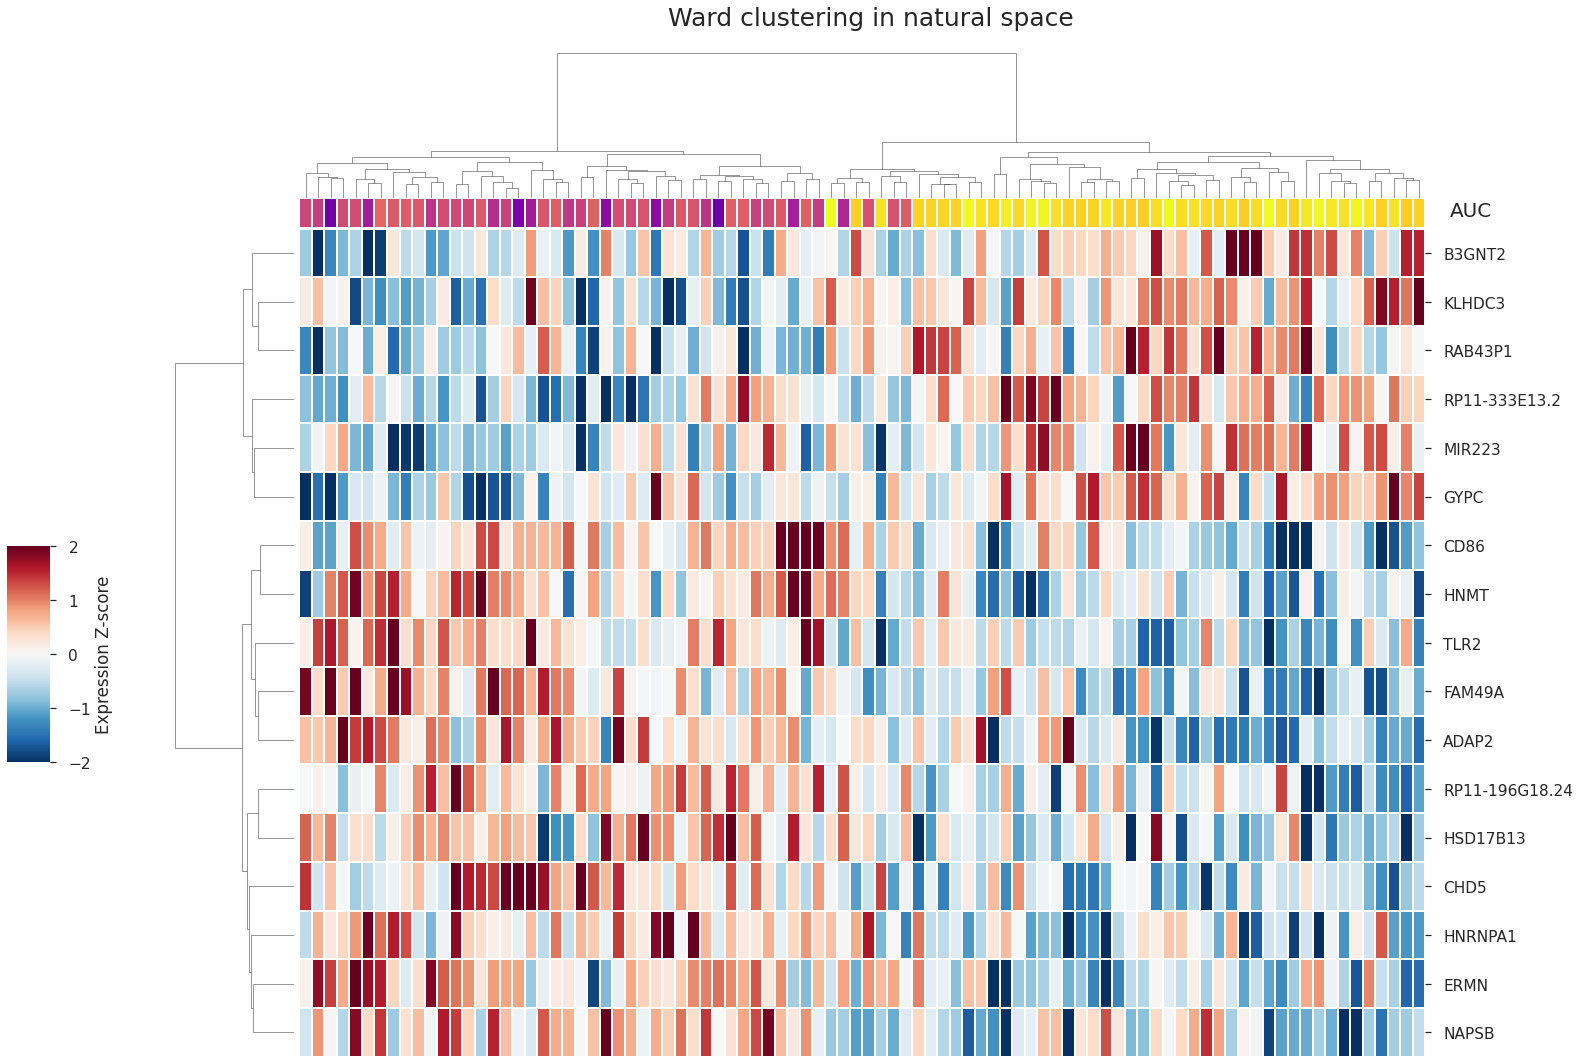

In [70]:
import matplotlib

sns.set(font_scale=1.4)
plt.figure(figsize=(30,20))

## AUC value label for the samples
cmap = matplotlib.cm.get_cmap('plasma')
col_col = cmap( df_aml.auc/df_aml.auc.max() )


a=sns.clustermap(X_aml.T, #data
                 z_score=0,method='ward',   #clustering method
                 figsize=(20,15),linewidths=.05,dendrogram_ratio=(.1, .15), #graphical stuff
                 col_colors=col_col,        # coloring columns
                 cmap='RdBu_r',vmin=-2,vmax=2,   # colobar arguments
                 cbar_pos=(-.1, .32, .03, .2),
                 cbar_kws={'label':'Expression Z-score'})
## removing column labels as they as meaningless here
b=a.ax_heatmap
b.set_xticks([])
l2=b.legend(loc='upper left',bbox_to_anchor=(1.01,1.05),frameon=False)
l2.set_title(title='AUC',prop={'size':20})
a.fig.suptitle('Ward clustering in natural space',fontsize=25,y=1.02) 
plt.show()

Next we would like perform hierachical clustering using the sklearn [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class. 
We  will test an array of  numbers of clusters in order to choose the optimal number of clusters according to the silhouette score.

Counter({0: 48, 1: 42})


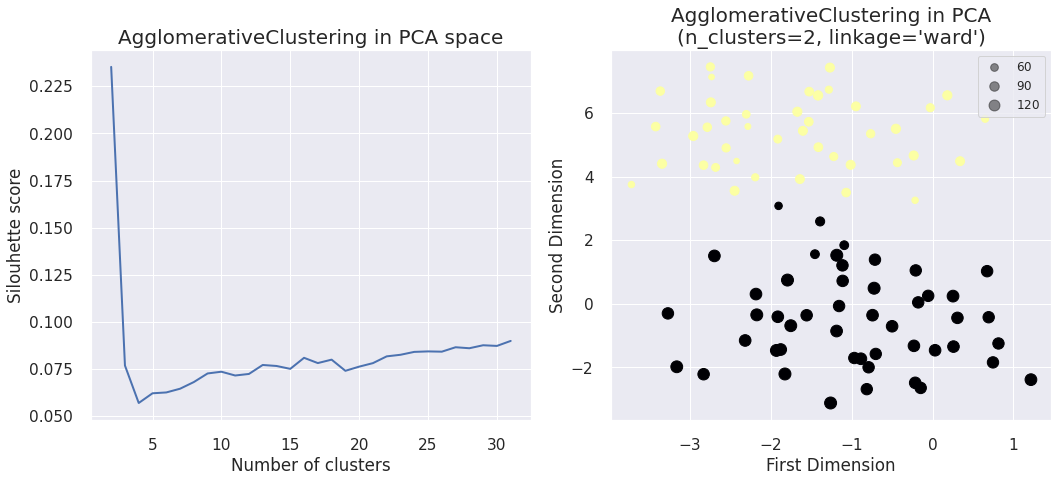

In [72]:
from collections import Counter

pca = PCA()
x_pca = pca.fit_transform(X_aml) # calculates coordinates of row vectors in X in PC space


nr_clusters = np.arange(30)+2

scores = []
best_labels = []
best_score = -1
best_nr_clusters = 0

for n in nr_clusters:
    hc = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    hc.fit(x_pca)
    score=silhouette_score(x_pca,hc.labels_)
    
    if score > best_score:
        best_labels = hc.labels_
        best_score = score
        best_nr_clusters = n
        
    scores.append(score)

print(Counter(best_labels))
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(nr_clusters, scores, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silouhette score')
plt.title('AgglomerativeClustering in PCA space',fontsize=20)


plt.subplot(1,2,2)
sc=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=best_labels,s=df_aml.auc/2,cmap='inferno')
plt.legend(*sc.legend_elements("sizes", num=4, alpha=0.5),fontsize=12)
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('AgglomerativeClustering in PCA\n(n_clusters={0}, linkage=\'ward\')'.format(best_nr_clusters),fontsize=20)
plt.tight_layout()
plt.show()

In [73]:
#Just some code to plot the dendrogram that will be explained below
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

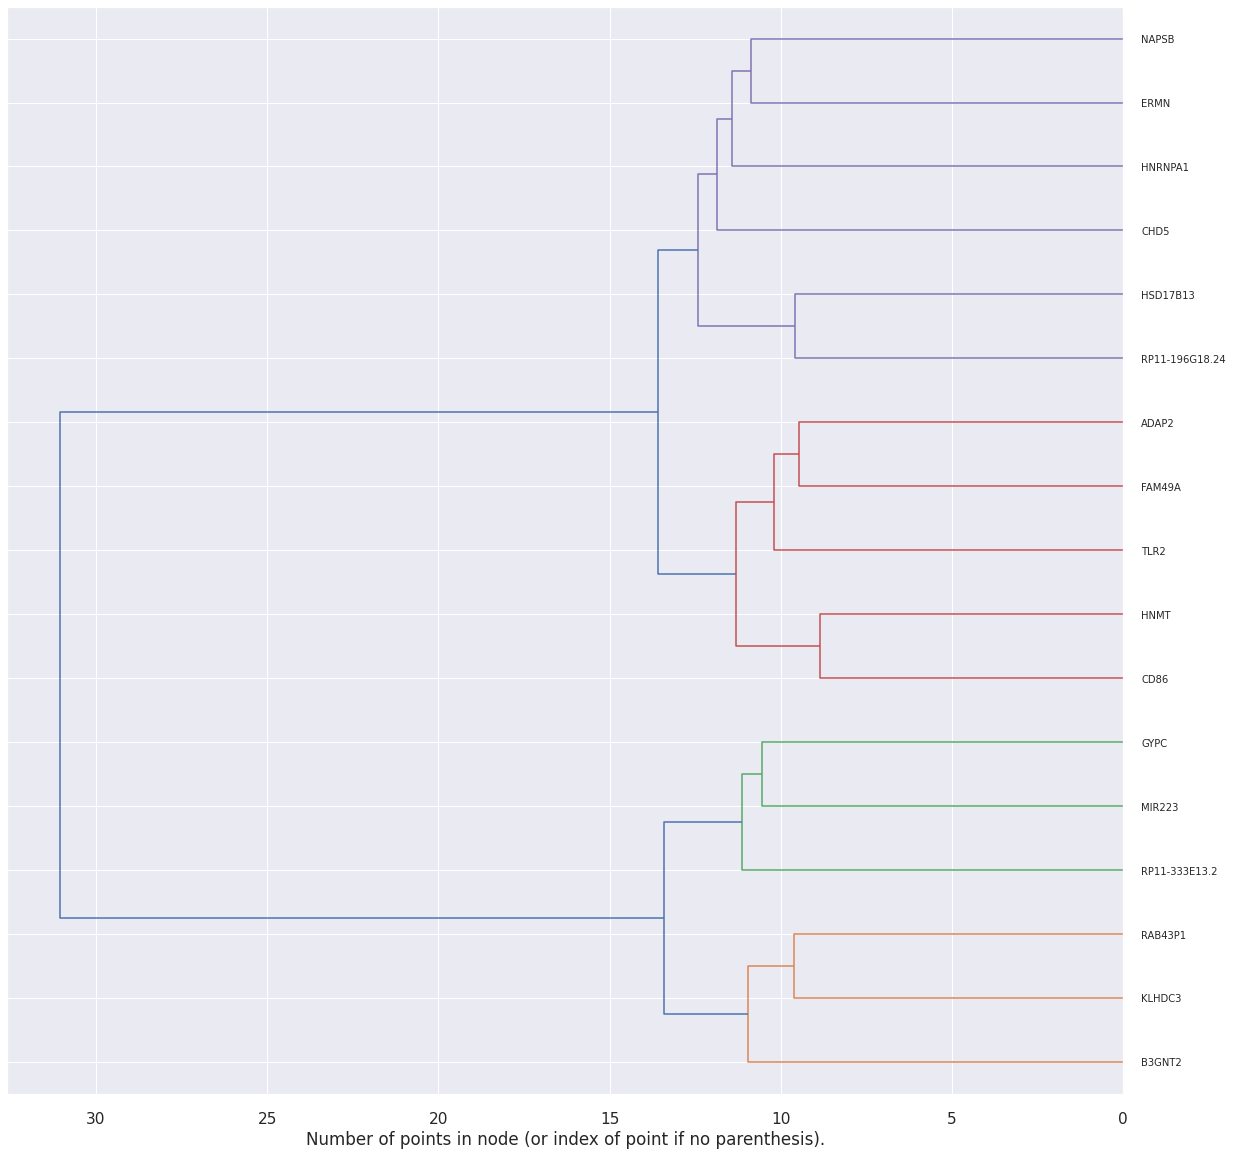

In [74]:
from sklearn import cluster
pylab.rcParams['figure.figsize'] = 20, 20

## getting the overall clustering 
dendro = cluster.AgglomerativeClustering( n_clusters=None,distance_threshold=0, linkage='ward' )
# here n_cluster = none because we want to explore the link
# between threshold choice and number of clusters
dendro.fit(X_aml.T)
plot_dendrogram(dendro,
                color_threshold=13,
                labels=X_aml.T.index, 
                orientation='left',leaf_font_size=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The dendogram is the representation of the effect of your-cut off to define a cluster. For example if you decide that your threshold is going to be 15 : then you only have two clusters. If you change it to 10 you will have 3 clusters. If you put it to 0 : each point is a cluster!

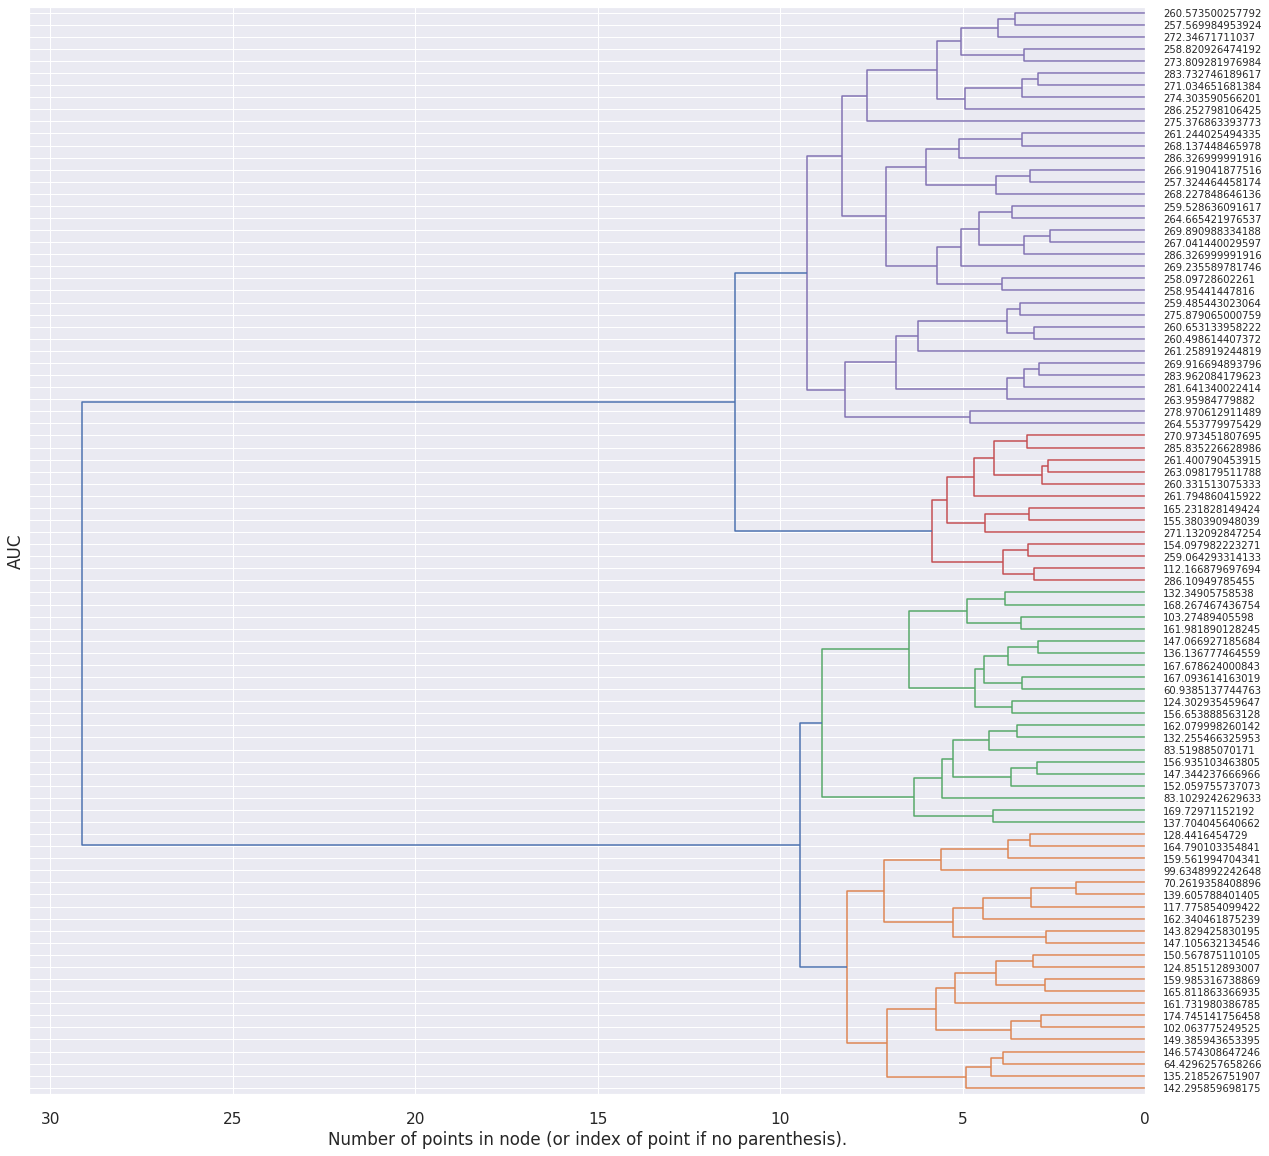

In [75]:
pylab.rcParams['figure.figsize'] = 20, 20
dendro = cluster.AgglomerativeClustering(
        n_clusters=None,distance_threshold=0, linkage='ward')

# clustering of samples 
dendro.fit(X_aml)
plot_dendrogram(dendro,
                color_threshold=9.4,
                labels=list(df_aml.auc), 
                orientation='left',leaf_font_size=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("AUC")
plt.show()

`AgglomerativeClustering` proposes a number of options regarding how to compute the similarity between clusters: the `linkage` option:



 * `ward` minimizes the variance of the clusters being merged.
 * `average` uses the average of the distances of each observation of the two sets.
 * `complete` or `maximum` linkage uses the maximum distance between all observations of the two sets.
 * `single` uses the minimum of the distances between all observations of the two sets.

You can read more about these and their difference in [sklearn User's Guide](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

[Back to ToC](#toc)

## DBSCAN <a class="anchor" id="DBSCAN-bullet"></a>

DBSCAN - **D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise [Ester et al., Proc KDD, 1996](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220) finds core points of high density and expands clusters from them. 
It works well for **data which contains clusters of similar density**. 

The algorithm starts by defining core points (points that are densely packed : at least `min_samples` points within a distance `eps` from each other). Then it expands a seed cluster $C_k$ by adding a point $p_j$ to the cluster if there a point $p_{l} \in C_k$ with $dist(p_j-p_{l})<\epsilon$. Points that cannot be linked to a seed cluster are marked as outliers.

![Pca](../images/db.png)

The average run time complexity of DBSCAN is $O(n.log(n))$ (worst case $O(n^2)$), which makes it **attractive for large datasets**.

First, we need to have an idea in which range $\epsilon$ will be:

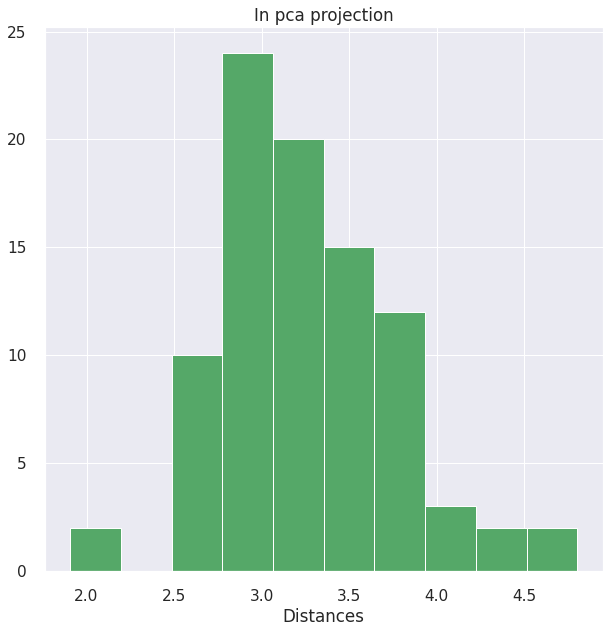

In [76]:
from sklearn.metrics import pairwise_distances

# here the euclidian distance makes sense in the PCA space where each dimension is independent
D = pd.DataFrame(pairwise_distances(x_pca, metric='euclidean')) 
dists = D[D>0].min(axis=1) # get nearest neighbor distances

plt.figure(figsize=(10,10))
plt.hist(dists, color="g",bins=10)
plt.xlabel("Distances")
plt.title('In pca projection')
plt.show()

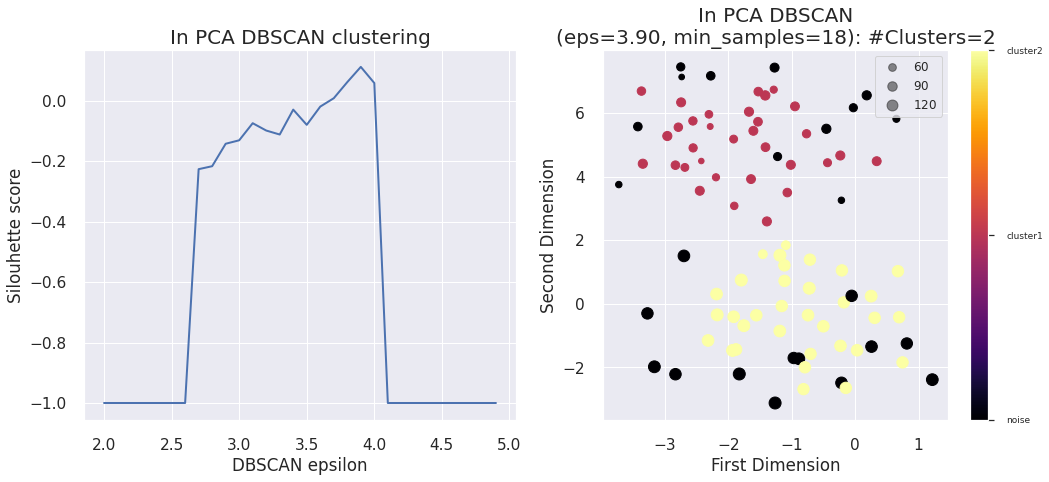

In [77]:
from sklearn import cluster

eps = np.arange(2, 5.0, 0.1)
nr_samples = np.arange(2,30,2)

scores = []
best_labels = []
best_score = -1
best_eps = 0
best_nr_clusters = 0
best_min_samples = 0

## we will test several values of epsilon and several values of number of minimum samples
for e in eps:
    best_eps_score = -1
    for n in nr_samples:
        dbscan = cluster.DBSCAN(eps=e, min_samples=n, metric = "euclidean")
        dbscan.fit_predict(x_pca)
        
        # getting the number of clusters found. We want to account for -1 
        # which is not a cluster and means the point is an "outlier"
        nb_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        ## DBSCAN qualified everything as outliers or the same cluster...
        if nb_clusters <= 1 : 
            continue
        
        score=silhouette_score(x_pca,dbscan.labels_)
        
        if score > best_eps_score:
            best_eps_score = score

        if score > best_score:
            best_labels = dbscan.labels_
            best_score = score
            best_eps = e
            best_min_samples = n
        

    scores.append(best_eps_score)

best_nr_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
col=[b if b>=0 else -1 for b in best_labels]

    
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(eps, scores, ls="-", lw=2)
plt.xlabel('DBSCAN epsilon')
plt.ylabel('Silouhette score')
plt.title('In PCA DBSCAN clustering',fontsize=20)

plt.subplot(1,2,2)
sc=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=col,s=df_aml.auc/2,cmap='inferno')
plt.legend(*sc.legend_elements("sizes", num=4, alpha=0.5),fontsize=12,loc='best')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('In PCA DBSCAN\n(eps={0:.2f}, min_samples={1}): #Clusters={2}'.format(best_eps,best_min_samples,
                                                                       best_nr_clusters),fontsize=20)
cb = plt.colorbar(sc,ticks=np.arange(-1,len(set(col))-1,1))
cb.ax.tick_params(labelsize=9)
cb.ax.set_yticklabels(['noise']+['cluster' +str(i) for i in np.arange(1,len(set(col)),1)])
plt.tight_layout()

plt.show()

[Back to ToC](#toc)

## What is the best method for clustering ? <a id='best'></a>

As you surely suspect by now, there is no perfect method. 
Each algorithm makes different assumptions about the structure of your data and will thus behave well or bad depending on howyour data is actually structured.

Let's demonstrate by displaying how different algorithm perform on different dataset (example taken from the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)):

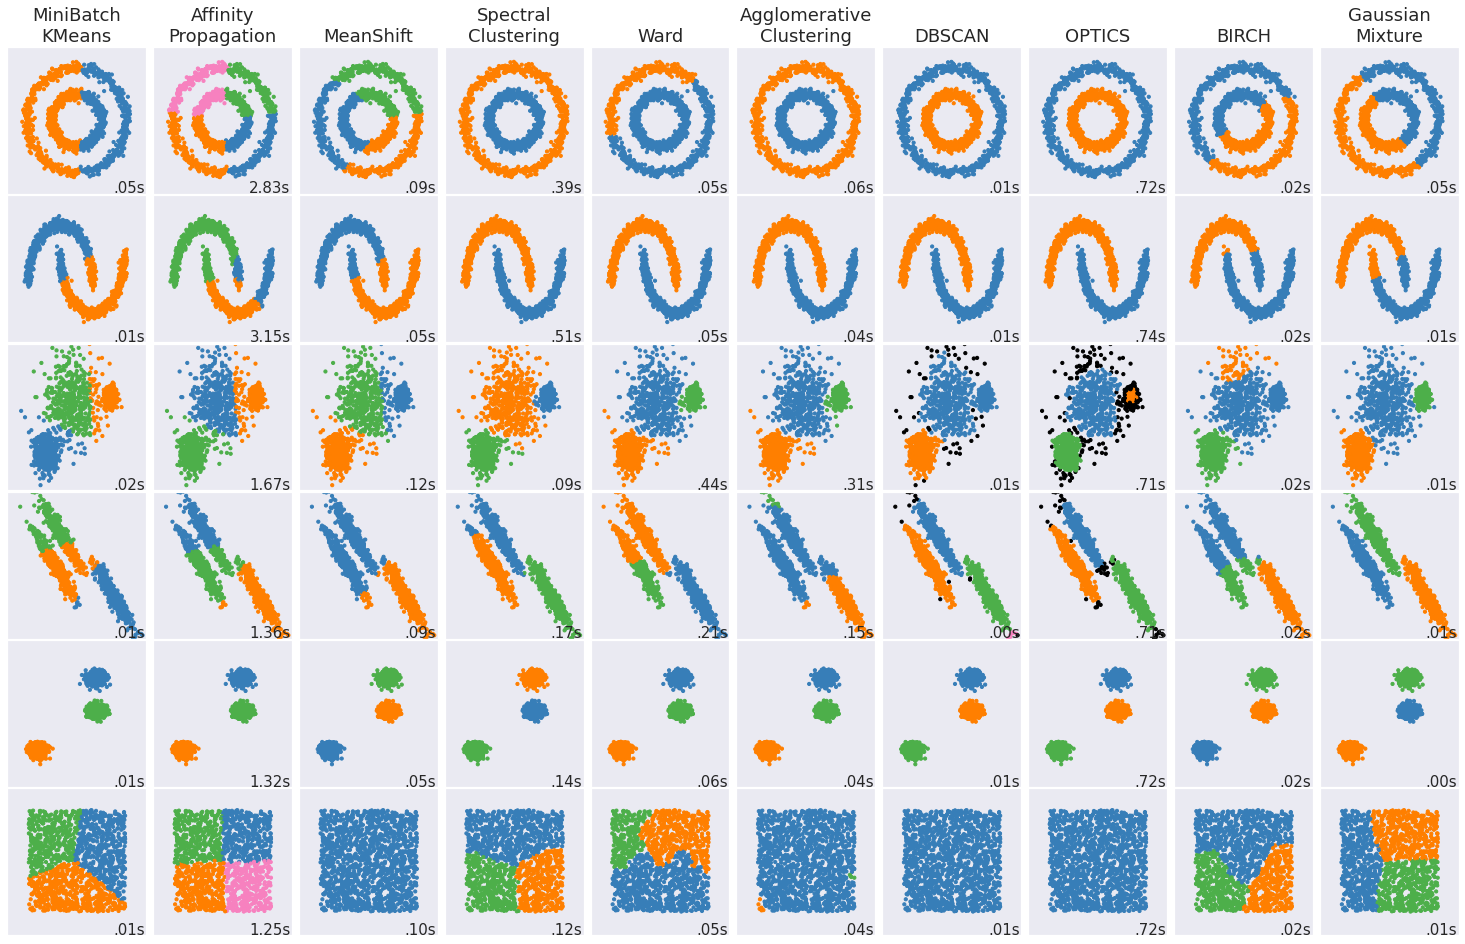

In [78]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

[Back to ToC](#toc)

# Appendix <a class="anchor" id="appendix-bullet"></a>

### 'Whiten' a data matrix <a class="anchor" id="whiten-bullet"></a>

'Whitening' is a process to reduce correlations between columns in a $NxM$ data matrix $\pmb{X}$ ($N$ samples and $M$ features). It uses PCA to transform $\pmb{X}$ into $\pmb{X'}$ with $\pmb{X'}^T\pmb{X'}=\pmb{\mathbb{1}}$. The process consists of 2 steps:

<ol>
<li>Zero centering around column means: $x_{ij}=x_{ij}-\frac{1}{N}\sum_{k=1}^{N}x_{kj}$</li>
<li>Rotation to PC basis and scaling: $\pmb{X'}=\pmb{X}\pmb{W}\pmb{D^{-\frac{1}{2}}}$, where $\pmb{W}$ is the matrix containing the PC's and D a diagonal matrix containing the variances. This transformation projects on the PC basis vectors and divides by the standard deviations.</li>
</ol>



[Back to ToC](#toc)
### UMAP <a class="anchor" id="umap-bullet"></a>

t-SNE has some disadvantages:

<ol>
<li>Speed. t-SNE computations takes a long time for large datasets</li>
<li>Dimensions. t-SNE is not applicable for more than 2-3 dimensions</li>
<li>Global Structure: t-SNE preserves local but not global structure</li>
</ol>

There comes UMAP ([McInnes et al.,arxiv, 2018](https://arxiv.org/abs/1802.03426)), which you probably know from single cell RNA-seq papers. It is similar to t-SNE, but differs in some important details, which make it faster, applicable to more than 2 dimensions and preserve the global structure better (better doesn't mean perfectly, it is still a local structure algo as you can deduce by the hyperparameter n_neighbors). Here is how it works:

UMAP assumes an exponential weight between the high dimensional data points: 

$\mu_{ij}=e^{-\frac{d(x_{i},x_{j})-\rho_i}{\sigma_i}}$

$\rho_i$ is the distance $d(x_{i},x_{k})$ of $x_{i}$ to its nearest neighbor $x_{k}$. 

$\sigma_i$ is chosen such that $\sum_{k \in NN(i,n)}\mu_{ik} = log_2(n)$, where $NN(i,n)$ is the set of $n$ nearest neighbors of $x_i$. 

In contrast to t-SNE the weights are not normalized, which saves computation time.

Next the weights $\mu_{ij}$ are turned into a weighted adjacency matrix and spectral clustering is used to find an initial embedding of the data points in the low dimensional space.

For the representation in the low dimensional space, UMAP uses a heavy tailed weight:

$\nu_{ij} = (1 + a(|x_i − x_j|_2^2)^b)^{−1}$

UMAP determines the parameters $a$ and $b$ by a least square fitting procedure. As a similarity measure between the $\mu_{ij}$ and $\nu_{ij}$ distributions it uses:

$C=-\sum_{i}\sum_{j}[\mu_{ij}log(\nu_{ij}) + (1-\mu_{ij})log(1-\nu_{ij})]$

UMAP uses stochastic gradient descent algorithm to minimize $C$. The spectrum clustering initialisation as well as the second term in $C$ are supposed to provide a better embedding for distant clusters compared to t-SNE.

UMAP implements an efficient nearest neighbor search and has an overall complexity of $O(N^{1.14})$.

The main input parameters for UMAP are


* `n_components`: dimension of the embedding
* `n_neighbors`: numer of nearest neigbors to consider (corresponds to $n$ in the text)
* `min_dist`: points in embedded space need to be separeted by a distance of at least `min_dist`
* `metric`: metric to be used for measuring distances (corresponds to $d(x,y)$ in the text)


Further information and tutorials you can find un the [UMAP page](https://umap-learn.readthedocs.io/en/latest/index.html).

In [79]:
!pip install umap-learn

  Using cached umap_learn-0.5.1-py3-none-any.whl
     |████████████████████████████████| 1.1 MB 368 kB/s eta 0:00:01
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52359 sha256=8eca86a2404b5d6ecc13cd82f826eb3c3a8e75369946386ca7a7ab73fc1588ac
  Stored in directory: /home/seb/.cache/pip/wheels/c7/0d/f8/e89d09e0c7419141e444bd59072cc195df4a88785c1052834b
Successfully built pynndescent


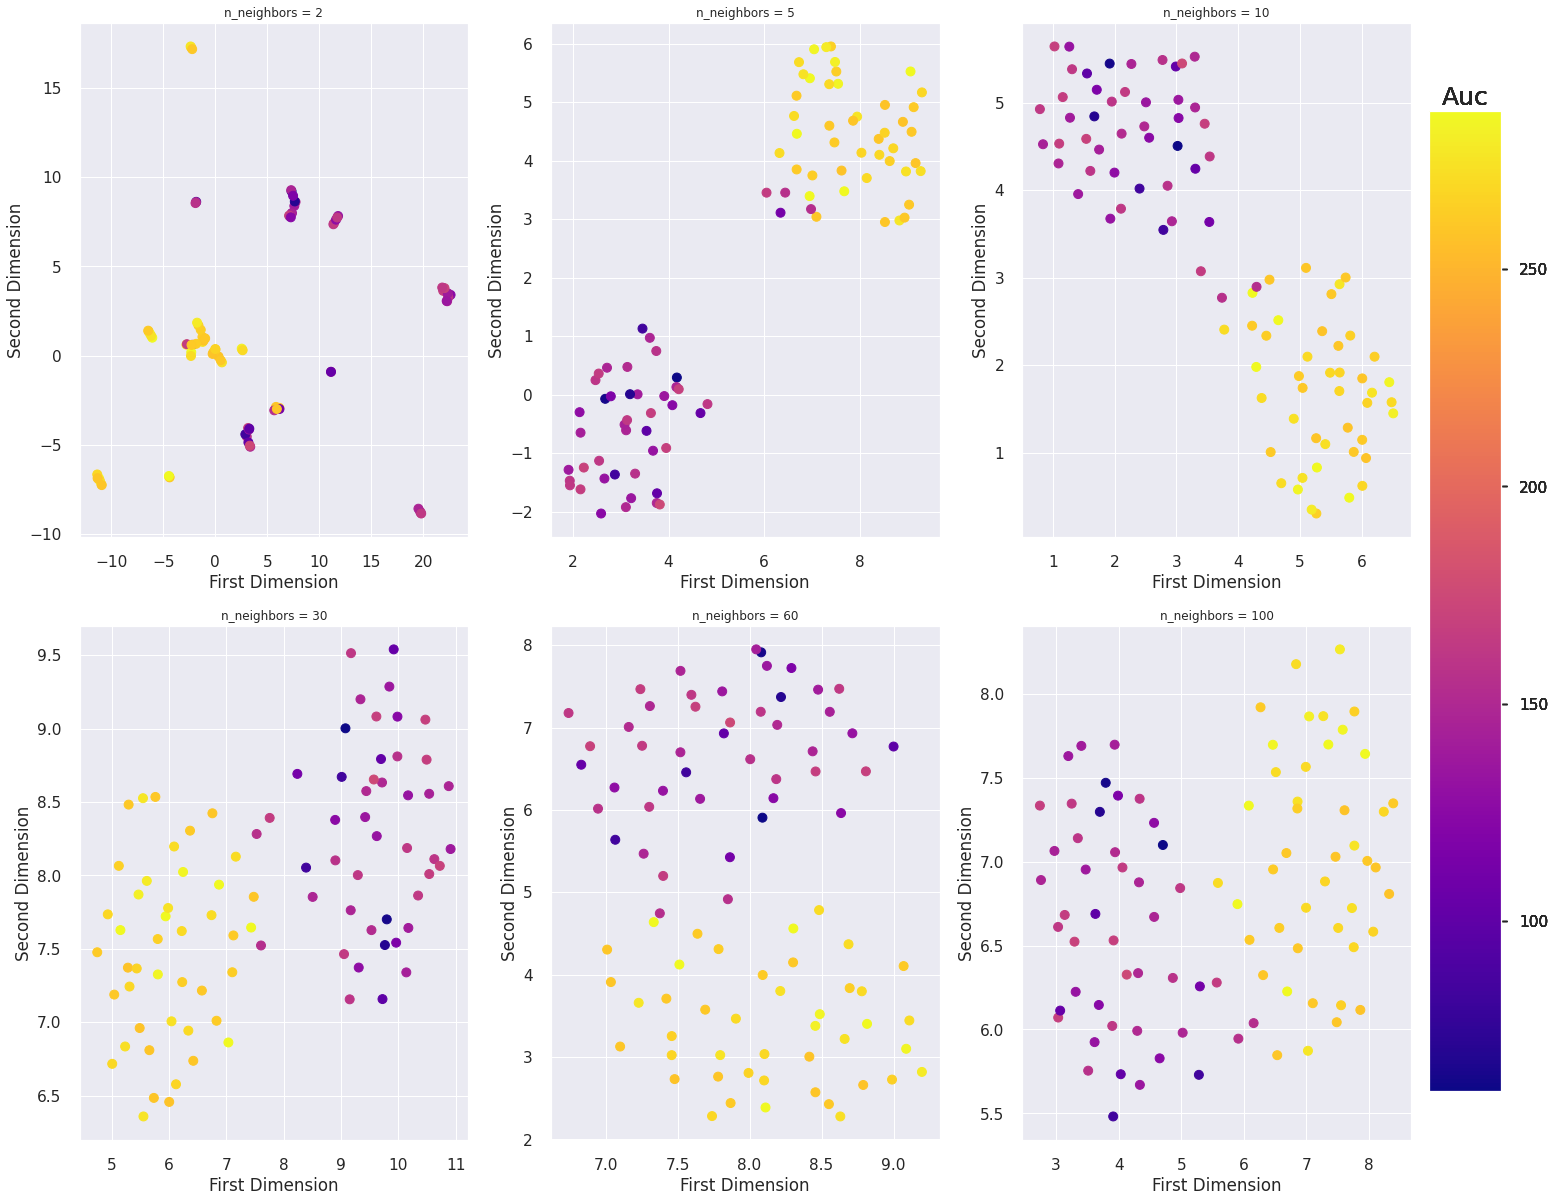

In [80]:
import umap.umap_ as umap

nn=[2,5,10,30,60,100] #n_neighbors parameters to test
plt.subplots(figsize=(20,17))
for j in range(len(nn)):
    plt.subplot(2,3,j+1)
    umaper = umap.UMAP(n_components=2,n_neighbors=nn[j])
    x_umap = umaper.fit_transform(X_aml)

    aa=plt.scatter(x_umap[:, 0], x_umap[:, 1],c=df_aml.auc,s=80,cmap='plasma')
    plt.title('n_neighbors = {0}'.format(nn[j]),fontsize=12)
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    axo = plt.axes([1,0.1,0.05,0.8])

    plt.title("Auc",fontsize=25)
    plt.colorbar(aa, cax=axo, orientation='vertical')
plt.tight_layout()
plt.show()

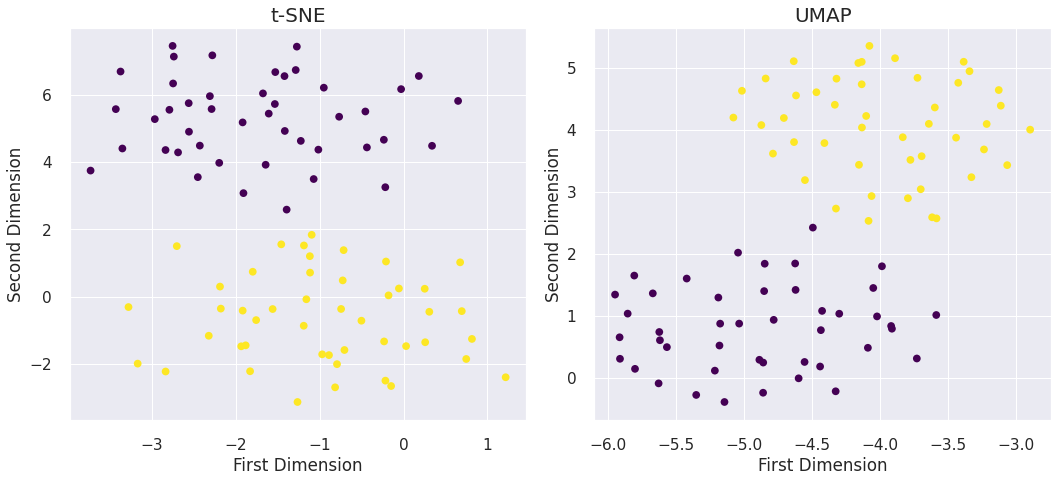

In [81]:
from sklearn import cluster

umaper = umap.UMAP(n_components=2,n_neighbors=50)
x_umap = umaper.fit_transform(X_aml)


plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans_2.labels_, s=60, lw=0, cmap='viridis')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('t-SNE',fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=kmeans_2.labels_, s=60, lw=0, cmap='viridis')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('UMAP',fontsize=20)
plt.tight_layout()

plt.show()

[Back to ToC](#toc)

## Gaussian mixtures <a class="anchor" id="gm-bullet"></a>

In Gaussian mixture modeling [Fraley & Raftery, The Computer Journal, 1998](https://academic.oup.com/comjnl/article-abstract/41/8/578/360856) we represent the data $\pmb{X}$ as a mixture model normal probability distributions:

$p(\pmb{x}) = \sum_{i=1}^{K}\pi_iN(\pmb{x}|\pmb{\mu_i},\pmb{\Sigma}_i)$, 

where $N(\pmb{x}|\pmb{\mu},\pmb{\Sigma})$ is a multidimensional Gaussian distribution with mean $\pmb{\mu}$ and covariance matrix $\pmb{\Sigma}$. The method uses the expectation-maximization algorithm to find the mixture components $\pmb{\pi_i}$, $\pmb{\mu_i}$ and covariance matrix $\pmb{\Sigma}_i$.

The sklearn [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) class implements the algorithm. It allows you to specify the number of clusters (`n_components`), intitial values for the parameters and constrains on the covariance matrices $\pmb{\Sigma}_i$. 

![gm](../images/gm.png)

A Bayesian version [BayesianGaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture) uses priors for the mixture parameters.

[0.48351168 0.51648832]


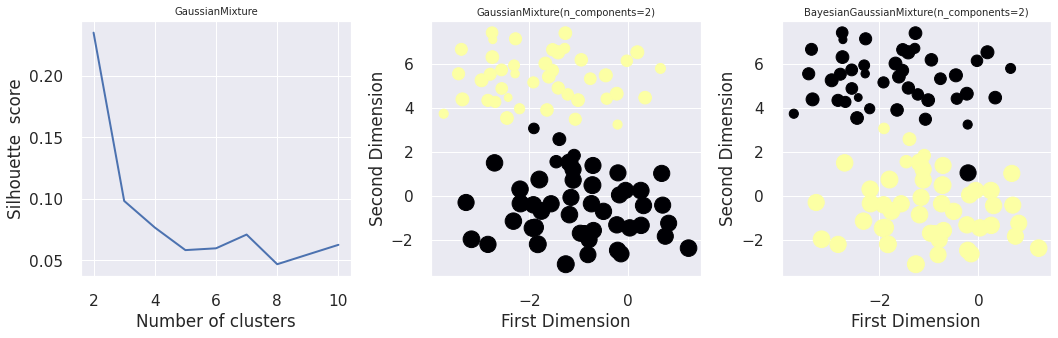

In [82]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

nr_clusters = np.arange(9)+2

silouhette = []
best_score = -1
best_nr_clusters = 0
best_labels=[]
for n in nr_clusters:
    gmm = mixture.GaussianMixture(n)
    gmm.fit(x_pca)
    labels=gmm.predict(x_pca)
    score = silhouette_score(x_pca,labels)
    silouhette.append(score)

    if score > best_score:
        best_score = score
        best_nr_clusters = n
        best_gmm = gmm
        best_labels=labels
        
best_labels = best_gmm.predict(x_pca)

bgmm = mixture.BayesianGaussianMixture(n_components=len(set(best_labels)),covariance_type='full',weight_concentration_prior=0.01)
bgmm.fit(x_pca)
best_labels_bayes = bgmm.predict(x_pca)
print(np.sort(bgmm.weights_))

plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(nr_clusters, silouhette, ls="-", lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette  score')
plt.title('GaussianMixture',fontsize=10)

plt.subplot(1,3,2)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=best_labels,s=df_aml.auc,cmap='inferno')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('GaussianMixture(n_components={0})'.format(best_nr_clusters),fontsize=10)

plt.subplot(1,3,3)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=best_labels_bayes,s=df_aml.auc,cmap='inferno')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('BayesianGaussianMixture(n_components={0})'.format(len(set(best_labels))),fontsize=10)
plt.tight_layout()

plt.show()